# Movie Recommender Systems - DreamStream 

Benedikt Tremmel (60253) 

Leonardo Hans Heinemann (60384) 

Maximilian Schön (50163) 

Gilian Dustin Wagner (58029) 

Malte Nicolas Haupt (58733) 

# 1. Introduction

## 1.1 Overview

This project aims to build a movie recommendation system for the streaming service **DreamStream**. The system will be based on a dataset containing information about 45,000 movies and 26 million ratings from 270,000 DreamStream users. 

The data can be found here: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data

Recommender systems are essential for platforms like **DreamStream**, enabling them to provide personalized movie recommendations - a key factor in competing with other platforms. However, **DreamStream** is currently facing challenges with increasing user retentions. After several months of evaluation, external consultants have identified a major issue with the current recommender system: it fails to meet user expectations due to inaccurate and not relevant recommendations, increasing the likelihood of subscription cancellations. Thereby, the system's shortcomings are identified to come from its reliance on an oversimplified dataset and its failure to align with current industry standards.

In response to this challenge, **DreamStream** expanded their data collection efforts to include a broader range of data types about users and movies. Based on the new data, DreamStream wants to build a new recommender system that aligns with current industry standards. Thereby, the company seeks an independent team to rebuild the system from scratch without being compromised by the methods of the old one. Yet, as deployment comes with several risks and costs, the new system is aimed to be tested offline in the best possible way. As the issue of user retention has been directly linked to the relevance of the recommendations provided, the new system's success will be primarily evaluated based on its accuracy in delivering personalized movie suggestions.

**DreamStream** provided the following data, stored in a relational database:

- **Movies Metadata**: Contains information about 45,000 movies. This includes data such as the movie title, release date, budget, revenue, genres, keywords, production companies, production countries, spoken languages, and runtime.
- **Keywords**: Contains the keywords associated with each movie.
- **Credits**: Contains information about the cast and crew of each movie.
- **Links**: Contains the IMDB and TMDB IDs for each movie.
- **Ratings**: Contains 26 million ratings from 270,000 users for all 45,000 movies.


The project will be divided into the following steps:
1. **Introduction**: An overview of the project and the business problem that needs to be addressed.
2. **Data Preprocessing**: The data will be cleaned, transformed, and merged to create a dataset that can be used for an Exploratory Data Analysis (EDA).
3. **Exploratory Data Analysis (EDA)**: The data will be analyzed to gain insights into the distribution of movies, ratings, and other relevant information. Some further cleaning and preprocessing steps may be performed during this stage.
4. **Modeling**: Different recommendation methods will be implemented and evaluated to determine the best-performing model.


CRISP-DM methodology will be followed to ensure a structured and systematic approach to the project. Yet, a preprocessing step will be added to the beginning of the process to ensure the data is cleaned and transformed before the analysis begins. This is nessesary to reduce computational time and to ensure that the data is in the right format for the analysis.

The project will be implemented using Python and the following libraries:

## 1.2 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import shapiro
from ast import literal_eval
from collections import Counter
import datetime
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import scipy.stats
from scipy.sparse.linalg import svds
import math
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import warnings
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.sparse import csr_matrix
from surprise import accuracy
from sklearn.model_selection import ParameterGrid
warnings.filterwarnings("ignore")

# 2. Data Preprocessing

## 2.1. Loading Data

In [2]:
df_credits = pd.read_csv("data/credits.csv")
df_keywords = pd.read_csv("data/keywords.csv")
df_links = pd.read_csv("data/links.csv")
df_movies_metadata = pd.read_csv("data/movies_metadata.csv")
df_ratings = pd.read_csv("data/ratings.csv")

In [3]:
df_movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## 2.2. Removing Unnecessary Columns

To reduce computational time at an early stage, we will remove some unnecessary columns from the dataset.

#### df_ratings, df_credits, df_keywords and df_links

For `df_ratings` we keep all columns.

In [4]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


`df_credits`

Let's drop the crew column as it seems not to contain relevant information for a recommender system. We rather want to focus on the cast here.

In [5]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [6]:
df_credits.drop(columns="crew", inplace=True)

For now we keep it like this. We will later extract only the actor's name from the cast column.

`df_keywords`

Let's keep all columns here. We will later extract the keywords from the column "keywords".

In [7]:
df_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
df_keywords.iloc[0,1]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

`df_links`

Let's keep all columns here

In [9]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### df_movies_metadata

In [10]:
df_movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

We will drop some unnecessary columns in the df_movies_metadata dataset to reduce its size. 

`adult`

In [11]:
df_movies_metadata["adult"].value_counts()

adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

With 9 entries for True and 45454 values for False (and 3 wrong entries) we will drop the column as it does not provide us with any relevant or balanced information for model building

In [12]:
df_movies_metadata.drop(columns="adult", inplace=True)

`belongs_to_collection`

Let's try to understand this column.

In [13]:
df_movies_metadata[df_movies_metadata["belongs_to_collection"] == "{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}"]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
2997,"{'id': 10194, 'name': 'Toy Story Collection', ...",90000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story-2,863,tt0120363,en,Toy Story 2,"Andy heads off to Cowboy Camp, leaving his toy...",17.547693,...,1999-10-30,4.973669e+08,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The toys are back!,Toy Story 2,False,7.3,3914.0
15348,"{'id': 10194, 'name': 'Toy Story Collection', ...",200000000,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",http://disney.go.com/toystory/,10193,tt0435761,en,Toy Story 3,"Woody, Buzz, and the rest of Andy's toys haven...",16.96647,...,2010-06-16,1.066970e+09,103.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No toy gets left behind.,Toy Story 3,False,7.6,4710.0


It seems like that if there is a value in the column "belongs_to_collection"  there are several versions of the film for instance a movie trilogy like Toy Story 1 Toy Story 2 and Toy Story 3. We will keep this column for now and later transform it into a binary column to indicate if a movie belongs to a collection or not.

Let's examine the columns `budget` and `revenue`.

In [14]:
len(df_movies_metadata[df_movies_metadata["revenue"] == 0.0]) / len(df_movies_metadata)

0.8369330928605991

In [15]:
len(df_movies_metadata[df_movies_metadata["budget"] == "0"]) / len(df_movies_metadata)

0.8044032903708266

84% of all rows in "revenue" and 80% of all rows in "budget" have a value of 0. Those values are probably just unknown as it is unrealistic that many movies have 0 budget and 0 revenue. Therefore, both columns will be dropped as they provide not enough information for us.

In [16]:
df_movies_metadata.drop(columns=["revenue", "budget"], inplace=True)

Let's examine the difference between the columns `original_title` and `title`.

In [17]:
len(df_movies_metadata[df_movies_metadata["original_title"] != df_movies_metadata["title"]]) / len(df_movies_metadata)

0.2507808032375841

Only 25% original_title values are the same as the title values. Let's examine some cases where we have different entries:

In [18]:
df_movies_metadata[df_movies_metadata["original_title"] != df_movies_metadata["title"]]

,belongs_to_collection,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28,NaN,"[{'id': 14, 'name': 'Fantasy'}, {'id': 878, 'n...",NaN,902,tt0112682,fr,La Cité des Enfants Perdus,A scientist in a surrealist society kidnaps ch...,9.822423,/eVo6ewq4akfyJYy3GXkMsLNzEJc.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-05-16,108.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,Where happily ever after is just a dream.,The City of Lost Children,False,7.6,308.0
29,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,37557,tt0115012,zh,摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,1.100915,/qcoOCoN7viOhboGwhYXyApdDuiq.jpg,...,"[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",1995-04-30,108.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,In 1930's Shanghai violence was not the proble...,Shanghai Triad,False,6.5,17.0
32,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 12, ...",NaN,78802,tt0114952,fr,"Guillaumet, les ailes du courage",NaN,0.745542,/k6ODtR38dKEfuzSGjggr8KDyAF4.jpg,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1996-09-18,50.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wings of Courage,False,6.8,4.0
57,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,11010,tt0110877,it,Il postino,Simple Italian postman learns to love poetry w...,10.168437,/qkq2JfINRQi4Iu9VTMMtQFfmGWZ.jpg,...,"[{'iso_3166_1': 'BE', 'name': 'Belgium'}, {'is...",1994-09-22,108.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}, {'is...",Released,NaN,The Postman,False,7.6,181.0
58,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,99040,tt0112714,fr,Le confessionnal,"The year is 1952, in Quebec City. Rachel (16),...",0.120789,/8RCRrSAY8e3Qn5p9cNv188ogmZQ.jpg,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1995-09-29,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The Confessional,False,6.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45453,NaN,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,404604,tt5690142,hi,Maa,The bliss of a biology teacher’s family life i...,1.559596,/zZwbntqdfKdVgzH1RoMHa99g0mJ.jpg,...,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2017-07-07,146.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,Mom,False,6.6,14.0
45455,NaN,[],NaN,67179,tt0069215,it,San Michele aveva un gallo,Sentenced to life imprisonment for illegal act...,0.225051,/j1AN0L4motTt8SBxeTMXDtExsYl.jpg,...,[],1972-01-01,90.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,St. Michael Had a Rooster,False,6.0,3.0
45461,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0


`original title` is in the original language, `title` in English. Therefore, only `title` will be kept.

In [19]:
df_movies_metadata.drop(columns=["original_title"], inplace=True)

Let's examine the `popularity` column.

In [20]:
df_movies_metadata['popularity'] = pd.to_numeric(df_movies_metadata['popularity'], errors='coerce')
df_movies_metadata['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

From IMDB: "Our Most Popular charts use data from the search behavior of IMDb's more than 250 million monthly unique visitors to rank the hottest, most buzzed about movies and TV shows."

It is difficult to interpret the popularity score without additional context on its calculation. As we have a separate ratings dataframe we want to focus on, we will drop this column.

In [21]:
df_movies_metadata.drop('popularity', axis=1, inplace=True)

`poster_path`

Let's delete this column as we wont implement any image recognition in our models

In [22]:
df_movies_metadata.poster_path

0        /rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1        /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2        /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3        /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4        /e64sOI48hQXyru7naBFyssKFxVd.jpg
                       ...               
45461    /jldsYflnId4tTWPx8es3uzsB1I8.jpg
45462    /xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg
45463    /d5bX92nDsISNhu3ZT69uHwmfCGw.jpg
45464    /aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg
45465    /s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg
Name: poster_path, Length: 45466, dtype: object

In [23]:
df_movies_metadata.drop(columns=["poster_path"], inplace=True)

Let's proceed with the `status` column:

In [24]:
df_movies_metadata["status"].value_counts()

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

There are some films in the dataset which are not released yet. Those movies are not relevant for a Recommender System. We cut them out and drop the status column.

In [25]:
df_movies_metadata = df_movies_metadata[df_movies_metadata["status"] == "Released"]
df_movies_metadata.drop(columns=["status"], inplace=True)

Let's look at the `video` column, to understand what it represents:

In [26]:
df_movies_metadata["video"].value_counts()

video
False    44921
True        93
Name: count, dtype: int64

Only 93 of the values are True. Let's examine those further:

In [27]:
df_movies_metadata[df_movies_metadata["video"] == True]

,belongs_to_collection,genres,homepage,id,imdb_id,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,video,vote_average,vote_count
5492,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,15173,tt0298388,en,"Get ready as Bob the Tomato, Larry the Cucumbe...","[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-10-04,82.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22.0
11469,"{'id': 123438, 'name': 'Loose Change Collectio...","[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,What if...September 11th was not a surprise at...,"[{'name': 'Polar Film Medien GmbH', 'id': 52...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-01,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16.0
13564,NaN,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,A short film in which Quran verses are shown a...,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",NaN,Fitna,True,1.0,1.0
14271,"{'id': 190135, 'name': 'Love Hina Collection',...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,44685,tt0416938,ja,"The tests have come, and Keitaro can only hope...","[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'X...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3.0
14608,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/familyzone/playmobil/,35148,tt1512792,en,"Ahoy, matey! Your Favorite Playmobil toys have...",[],[],2009-10-13,140.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",NaN,Playmobil: The Secret of Pirate Island,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44286,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",NaN,161337,tt2381375,en,Underworld: Endless War is a collection of thr...,[],[],2011-10-19,18.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Underworld: Endless War,True,5.6,38.0
44798,NaN,"[{'id': 16, 'name': 'Animation'}, {'id': 27, '...",http://www.fat-pie.com/salad.htm,425916,tt1830238,en,"The adventures of Salad Fingers, an unspecifie...",[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",NaN,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Salad Fingers,True,8.5,4.0
44861,NaN,[],NaN,334795,tt2290966,ru,Four music videos of Kino band joined together...,[],[],1986-01-01,23.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Victor Tsoy's movie debut,The End of a Vacation,True,0.0,0.0
44981,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,461088,tt5689610,fa,When the corrupted groom starts shooting in th...,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2016-03-22,89.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",NaN,50 Kilos of Sour Cherry,True,0.0,0.0


We do not see any patterns in rows where the value of the video column is set to True. Additionally, as there are only 93 instances where this is the case, those rows will be dropped to enhance data quality. Also, the column will be kicked as it has no insight for us. 

In [28]:
df_movies_metadata= df_movies_metadata[df_movies_metadata["video"] == False]
df_movies_metadata.drop(columns="video", inplace=True)

`Vote Count and Vote Average`

Let's try to understand the Cote Count and Vote Average columns. 

In [29]:
# Min and Max vote count 
min_vote_count = df_movies_metadata['vote_count'].min()
max_vote_count = df_movies_metadata['vote_count'].max()

min_vote_count, max_vote_count

(0.0, 14075.0)

In [30]:
min_vote_average = df_movies_metadata['vote_average'].min()
max_vote_average = df_movies_metadata['vote_average'].max()

min_vote_average, max_vote_average

(0.0, 10.0)

- The vote count ranges from 0 to 14075, probably indicating the number of votes the movie received.
- The vote average ranges from 0 to 10, probably indicating the average rating of the movie.


In [31]:
df_movies_metadata['vote_count'].describe()

count    44921.000000
mean       111.103560
std        494.117134
min          0.000000
25%          3.000000
50%         10.000000
75%         35.000000
max      14075.000000
Name: vote_count, dtype: float64

We can also see that half of the movies have fewer than 10 votes. As this is a very low number of votes, making the votes not representative from a statistical perspective, we decide to drop the vote_count column as well as the corresponding vote_average column. We will only use the ratings dataframe for the ratings.

In [32]:
df_movies_metadata.drop(['vote_count', 'vote_average'], axis=1, inplace=True)

On top of that, the following columns will be dropped:
- `homepage`: not relevant for the model
- `tagline`: not relevant for the model

In [33]:
df_movies_metadata.drop(columns=["homepage", "tagline"], inplace=True)

## 2.3. Column Formats

Let's check and correct the column formats for every dataframe.

#### df_ratings, df_credits, df_keywords and df_links

In [34]:
df_ratings.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [35]:
df_credits.dtypes

cast    object
id       int64
dtype: object

In [36]:
df_keywords.dtypes

id           int64
keywords    object
dtype: object

In [37]:
df_links.dtypes

movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [38]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [39]:
df_ratings["rating"] = df_ratings["rating"].astype("Float64")
df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'], unit='s')
df_credits["id"] = df_credits["id"].astype("Int64")
df_keywords["id"] = df_keywords["id"].astype("Int64")
df_links[["movieId", "imdbId"]] = df_links[["movieId", "imdbId"]].astype("Int64")

For the column imdbId, let's check if all values are integers and convert them

In [40]:
if df_links['tmdbId'].dropna().apply(float.is_integer).all():
    df_links['tmdbId'] = df_links['tmdbId'].astype('Int64')
else:
    print("Values have digits after the decimal point.")

#### df_movies_metadata

A first overview shows us that a couple of column formats have to be changed for df_movies_metadata.

In [41]:
df_movies_metadata.dtypes

belongs_to_collection     object
genres                    object
id                        object
imdb_id                   object
original_language         object
overview                  object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
title                     object
dtype: object

In [42]:
df_movies_metadata.head()

,belongs_to_collection,genres,id,imdb_id,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,title
0,"{'id': 10194, 'name': 'Toy Story Collection', ...","[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story
1,NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,A family wedding reignites the ancient feud be...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Grumpier Old Men
3,NaN,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale
4,"{'id': 96871, 'name': 'Father of the Bride Col...","[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,Just when George Banks has recovered from his ...,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II


`id`

In [43]:
df_movies_metadata["id"] = df_movies_metadata["id"].astype("Int64")

`imdb_id`

In [44]:
df_movies_metadata[df_movies_metadata["imdb_id"].notna()]["imdb_id"].sort_values()

43777    tt0000001
32312    tt0000003
19138    tt0000005
17569    tt0000008
25900    tt0000010
           ...    
45179    tt7068896
45200    tt7078780
44969    tt7078926
45085    tt7104950
45371    tt7158814
Name: imdb_id, Length: 44906, dtype: object

All `imbd_id` values start with "tt". Let's delete those letters to align values with other imdb_id columns we have in other dataframes.

In [45]:
df_movies_metadata_2 = df_movies_metadata.copy()
df_movies_metadata_2["imdb_id"] = df_movies_metadata_2["imdb_id"].astype(str)
df_movies_metadata_2['last_2_chars'] = df_movies_metadata_2['imdb_id'].str[:2]
df_movies_metadata_2['last_2_chars'].value_counts()

last_2_chars
tt    44906
na       15
Name: count, dtype: int64

In [46]:
df_movies_metadata["imdb_id"] = df_movies_metadata["imdb_id"].str[2:]

In [47]:
df_movies_metadata["imdb_id"] = df_movies_metadata["imdb_id"].astype("Int64")

`release_date`

In [48]:
df_movies_metadata['release_date'] = pd.to_datetime(df_movies_metadata['release_date'])

### Missing Values

Let's check and cleaning missing values in our data. To do so, we will merge the dataframes df_keywords, df_links, df_credits, df_movies_metadata. df_ratings will be cleaned seperatly to safe computational time. 

In [49]:
df_merged = pd.merge(df_keywords, df_links, left_on='id', right_on='tmdbId', how='left')
df_merged = pd.merge(df_merged, df_credits, left_on='id', right_on='id', how='left')
df_merged = pd.merge(df_merged, df_movies_metadata, left_on="imdbId", right_on="imdb_id", how="left")
df_merged.drop(columns=["id_y", "imdb_id"], inplace=True)

As we have different Ids in the dataframes, to identify the movies, let's see which one we want to keep.

In [50]:
print(df_ratings["movieId"].min())
print(df_ratings["movieId"].max())

df_merged[['id_x', 'movieId', 'tmdbId', 'imdbId']].describe()

1
176275


,id_x,movieId,tmdbId,imdbId
count,46756.0,46756.0,46756.0,46756.0
mean,109630.739114,97647.136924,109630.739114,1003898.326161
std,112824.139177,57206.087054,112824.139177,1366859.752041
min,2.0,1.0,2.0,1.0
25%,26717.25,51125.0,26717.25,83509.75
50%,61377.0,110483.0,61377.0,287635.0
75%,159434.5,147392.5,159434.5,1560822.75
max,469172.0,176279.0,469172.0,7158814.0


We can see that the movieId column in df_ratings contains the same IDs as in the movieId column in df_merged. Let's drop the other columns and proceed with the NaN cleaning.

In [51]:
df_merged.drop(columns=["id_x", "imdbId", "tmdbId"], inplace=True)

#### df_ratings

No NaNs for df_ratings. Therefore, no cleaning necessary.

In [52]:
print(df_ratings.isna().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


#### df_merged

We have several columns with missing values in the merged dataframe. Let's check and clean them.

In [53]:
print("Total NaN values:\n ", df_merged.isna().sum())

Total NaN values:
  keywords                     0
movieId                      0
cast                         0
belongs_to_collection    42216
genres                     763
original_language          773
overview                  1714
production_companies       763
production_countries       763
release_date               832
runtime                   1018
spoken_languages           763
title                      763
dtype: int64


In [54]:
print("\nShare of NaN values:\n ", (df_merged.isna().sum()) / len(df_merged) * 100)


Share of NaN values:
  keywords                  0.000000
movieId                   0.000000
cast                      0.000000
belongs_to_collection    90.290016
genres                    1.631876
original_language         1.653264
overview                  3.665840
production_companies      1.631876
production_countries      1.631876
release_date              1.779451
runtime                   2.177261
spoken_languages          1.631876
title                     1.631876
dtype: float64


We have a high precentage of missing values for 'belongs_to_collection'. These makes sense as most movies do not belong to a collection. Therefore, we will leave those NaNs as they are for now.

Also, we can see a pattern for most of the variables where the number of missing values is the same. Overall the percentage of missing values is very low. Let's check for the ratio of missing values in the overall dataset.

In [55]:
print("Percentage of rows with mising values: ", (df_merged.drop(columns=['belongs_to_collection']).isna().any(axis=1).sum() / len(df_merged)*100).round(2))

Percentage of rows with mising values:  3.8


Let's drop all rows with missing values as they only account for 3.8% of the dataset and we want to ensure data completeness.

In [56]:
df_merged.dropna(subset=['genres', 'original_language', 'overview', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'title'], inplace=True)

### Check Ranges / Identify Outliers

#### df_ratings

We have ratings from 0 to 5. It seems like overall there are no outliers.

In [57]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,26024289.0,26024289
mean,1.350371e+05,1.584911e+04,3.52809,2007-02-12 05:33:52.691320064
min,1.000000e+00,1.000000e+00,0.5,1995-01-09 11:46:44
25%,6.716400e+04,1.073000e+03,3.0,2001-05-25 01:34:21
50%,1.351630e+05,2.583000e+03,3.5,2006-07-01 00:59:27
75%,2.026930e+05,6.503000e+03,4.0,2013-01-07 16:56:19
max,2.708960e+05,1.762750e+05,5.0,2017-08-04 06:57:50
std,7.817620e+04,3.108526e+04,1.065443,NaN


#### df_merged

In [58]:
df_merged.describe()

,movieId,release_date,runtime
count,44977.0,44977,44977.000000
mean,96594.315161,1992-04-21 20:52:51.861173376,95.137626
min,1.0,1874-12-09 00:00:00,0.000000
25%,48560.0,1978-06-23 00:00:00,85.000000
50%,109284.0,2001-09-14 00:00:00,95.000000
75%,146550.0,2011-01-06 00:00:00,107.000000
max,176279.0,2017-12-27 00:00:00,1256.000000
std,57335.768138,NaN,37.278343


We have some unusual values in the columns `runtime`, `vote_count` and `release_date`. Let's check those further.

`runtime`

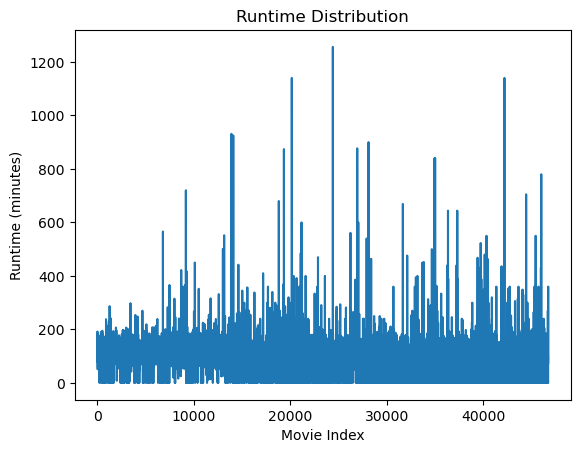

count    44977.000000
mean        95.137626
std         37.278343
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


In [59]:
ax = df_merged['runtime'].plot()

# Set the title and labels
ax.set_title("Runtime Distribution")
ax.set_xlabel("Movie Index")
ax.set_ylabel("Runtime (minutes)")

# Show the plot
plt.show()

print(df_merged['runtime'].describe())

It seems like we have some unusualy high and unusualy low values for the runtime.

In [60]:
num_movies_shorter_than_45min = len(df_merged[df_merged['runtime'] < 45])
percentage = num_movies_shorter_than_45min / len(df_merged) * 100
print("Percentage of movies shorter than 45 min : {:.2f}".format(percentage))

Percentage of movies shorter than 45 min : 6.01


6.01 % of the movies are shorter then 45 min. At this point we decide that we want to recommend movies that are at least 45 min long. Therefore, we will drop those rows. We will also drop all movies that are longer than 300 min (5 hours). This  is a decision we make at this point regarding the scope of the streaming service and its recommender system. Moreover, we can assume several outliers that do not represent real or only experimental movies. The longest cinematic movie ever created is 873 min long. (https://en.wikipedia.org/wiki/List_of_longest_films)

In [61]:
df_merged = df_merged[(df_merged['runtime'] >= 45) & (df_merged['runtime'] <= 300)].copy()

`release_date`

There seems to be something wrong with the Release Date as the earliest date is in the year 1874.

In [62]:
df_merged.sort_values(by="release_date")

,keywords,movieId,cast,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,release_date,runtime,spoken_languages,title
44410,"[{'id': 154802, 'name': 'silent film'}, {'id':...",170573,"[{'cast_id': 2, 'character': '', 'credit_id': ...",NaN,"[{'id': 36, 'name': 'History'}, {'id': 28, 'na...",en,Just as Fritz Lang’s Metropolis (1927) is test...,"[{'name': 'Johnson and Gibson', 'id': 74308}, ...","[{'iso_3166_1': 'AU', 'name': 'Australia'}]",1906-12-26,60.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",The Story of the Kelly Gang
25038,"[{'id': 6154, 'name': 'hell'}, {'id': 41011, '...",116578,"[{'cast_id': 1001, 'character': 'Dante Alighie...",NaN,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",it,Loosely adapted from Dante's Divine Comedy and...,"[{'name': 'Milano Films', 'id': 93689}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1911-07-01,68.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",L'inferno
17909,[],89323,"[{'cast_id': 10, 'character': 'King Edward IV'...",NaN,"[{'id': 18, 'name': 'Drama'}]",en,Shakespeare's tragedy of the hump-backed Duke ...,"[{'name': ""Le Film d'Art"", 'id': 1573}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1912-10-15,55.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Richard III
44366,"[{'id': 1405, 'name': 'roman empire'}, {'id': ...",170479,"[{'cast_id': 1001, 'character': 'Cleopatra, Qu...",NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",en,The fabled queen of Egypt's affair with Roman ...,"[{'name': 'Helen Gardner Picture Players', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",1912-11-13,88.0,[],Cleopatra
20718,[],100946,"[{'cast_id': 5, 'character': 'Fantômas / Gurn'...","{'id': 188534, 'name': 'Fantômas Serial', 'pos...","[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",fr,"For the arch-criminal Fantômas, no crime is to...",[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",1913-05-09,54.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Fantômas: In the Shadow of the Guillotine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43545,"[{'id': 131, 'name': 'italy'}, {'id': 818, 'na...",168492,"[{'cast_id': 4, 'character': 'Elio Perlman', '...",NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",en,Elio Perlman is spending the summer with his f...,"[{'name': 'Sony Pictures Classics', 'id': 58},...","[{'iso_3166_1': 'BR', 'name': 'Brazil'}, {'iso...",2017-10-27,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Call Me by Your Name
46291,"[{'id': 886, 'name': 'film making'}, {'id': 16...",175151,"[{'cast_id': 9, 'character': 'Himself', 'credi...",NaN,"[{'id': 99, 'name': 'Documentary'}]",en,78 shots. 52 cuts. The shower scene from PSYCHO.,"[{'name': 'Exhibit A Pictures', 'id': 63267}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-11-03,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",78/52
45809,[],173731,"[{'cast_id': 4, 'character': 'Sam', 'credit_id...",NaN,[],en,A former rodeo champ befriends a young man wit...,[],[],2017-11-17,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sweet Virginia
43540,"[{'id': 1382, 'name': 'factory'}, {'id': 2609,...",168478,[],NaN,"[{'id': 99, 'name': 'Documentary'}]",hi,This portrayal of the rhythm of life and work ...,[],[],2017-11-30,71.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Machines


It turns out that some films actually date back to as early as 1874. Therefore, those rows will be kept.

### Check for duplicates

`df_ratings`

In [63]:
df_ratings.duplicated().sum()

0

`df_merged`

In [64]:
number_of_dublicates = df_merged.duplicated().sum()
number_of_dublicates

1062

In [65]:
number_of_dublicates / len(df_merged) * 100

2.5184377149090564

There are 1055 duplicates in the df_merged dataset. Let's drop those rows, they only account for 2,5 % of the data.

In [66]:
df_merged.drop_duplicates(inplace = True)

## 2.4. Column Transformations

Let's transform some columns to make them more useable for the EDA and later model building.

First, we will transform the "belongs_to_collection" column to binary values to indicate if a movie belongs to a collection or not.

In [67]:
df_merged['belongs_to_collection'] = df_merged['belongs_to_collection'].notnull().astype(int)

Finally, we will extract some useful information from the columns "cast", "genres", "production_companies", "production_countries" and "spoken_languages".

`cast`

Let's extract the actors' names from the cast column.

In [68]:
df_merged.loc[0, 'cast']

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [69]:

def extract_cast_names(cast_str):
    try:
        # If cast_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        cast_data = ast.literal_eval(cast_str) if isinstance(cast_str, str) else cast_str
        if isinstance(cast_data, list):
            return [d.get('name') for d in cast_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {cast_str}. Error: {e}")
        return []

df_merged['actors'] = df_merged['cast'].apply(extract_cast_names)

df_merged[['movieId', 'actors']].head()

,movieId,actors
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,3,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [70]:
df_merged.drop(columns="cast", inplace=True)

`keywords`

Let's extract the keywords.

In [71]:
df_merged.loc[0,'keywords']

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [72]:
def extract_keyword_names(keyword_str):
    try:
        # If keyword_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        keywords_data = ast.literal_eval(keyword_str) if isinstance(keyword_str, str) else keyword_str
        if isinstance(keywords_data, list):
            return [d.get('name') for d in keywords_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {keyword_str}. Error: {e}")
        return []

df_merged['keywords_extracted'] = df_merged['keywords'].apply(extract_keyword_names)

df_merged[['movieId', 'keywords_extracted']].head()

,movieId,keywords_extracted
0,1,"[jealousy, toy, boy, friendship, friends, riva..."
1,2,"[board game, disappearance, based on children'..."
2,3,"[fishing, best friend, duringcreditsstinger, o..."
3,4,"[based on novel, interracial relationship, sin..."
4,5,"[baby, midlife crisis, confidence, aging, daug..."


In [73]:
df_merged.drop(columns="keywords", inplace=True)

`genres`

Let's extract the genre names.

In [74]:
df_merged.loc[0, 'genres']

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [75]:
def extract_genre_names(genre_str):
    try:
        # If genre_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        genres_data = ast.literal_eval(genre_str) if isinstance(genre_str, str) else genre_str
        if isinstance(genres_data, list):
            return [d.get('name') for d in genres_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {genre_str}. Error: {e}")
        return []

df_merged['genre_extracted'] = df_merged['genres'].apply(extract_genre_names)

df_merged[['movieId', 'genre_extracted']].head()


,movieId,genre_extracted
0,1,"[Animation, Comedy, Family]"
1,2,"[Adventure, Fantasy, Family]"
2,3,"[Romance, Comedy]"
3,4,"[Comedy, Drama, Romance]"
4,5,[Comedy]


In [76]:
df_merged.drop(columns="genres", inplace=True)

`Production Company`

Let's extract the production companies.

In [77]:
df_merged.loc[10, 'production_companies']

"[{'name': 'Columbia Pictures', 'id': 5}, {'name': 'Castle Rock Entertainment', 'id': 97}]"

In [78]:
def extract_production_company_names(company_str):
    try:
        # If company_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        companies_data = ast.literal_eval(company_str) if isinstance(company_str, str) else company_str
        if isinstance(companies_data, list):
            return [d.get('name') for d in companies_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {company_str}. Error: {e}")
        return []

df_merged['production_company_extracted'] = df_merged['production_companies'].apply(extract_production_company_names)

df_merged[['movieId', 'production_company_extracted']].head()

,movieId,production_company_extracted
0,1,[Pixar Animation Studios]
1,2,"[TriStar Pictures, Teitler Film, Interscope Co..."
2,3,"[Warner Bros., Lancaster Gate]"
3,4,[Twentieth Century Fox Film Corporation]
4,5,"[Sandollar Productions, Touchstone Pictures]"


In [79]:
df_merged.drop(columns="production_companies", inplace=True)

`Production Country`

Let's extract the production countries.

In [80]:
df_merged.loc[0, 'production_countries']

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [81]:
def extract_production_country_names(country_str):
    try:
        countries_data = ast.literal_eval(country_str) if isinstance(country_str, str) else country_str
        if isinstance(countries_data, list):
            return [d.get('name') for d in countries_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {country_str}. Error: {e}")
        return []

df_merged['production_country_extracted'] = df_merged['production_countries'].apply(extract_production_country_names)

df_merged[['movieId', 'production_country_extracted']].head()

,movieId,production_country_extracted
0,1,[United States of America]
1,2,[United States of America]
2,3,[United States of America]
3,4,[United States of America]
4,5,[United States of America]


In [82]:
df_merged.drop(columns="production_countries", inplace=True)

`Spoken Languages`

Let's extract the spoken languages.

In [83]:
df_merged.loc[1, 'spoken_languages']

"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]"

In [84]:
def extract_spoken_language_names(language_str):
    try:
        # If language_str is not NaN and is a string, parse it; otherwise, it's already in expected format or NaN
        languages_data = ast.literal_eval(language_str) if isinstance(language_str, str) else language_str
        if isinstance(languages_data, list):
            return [d.get('name') for d in languages_data if 'name' in d]
        else:
            return []
    except ValueError as e:
        print(f"Error parsing: {language_str}. Error: {e}")
        return []

df_merged['spoken_language_extracted'] = df_merged['spoken_languages'].apply(extract_spoken_language_names)

df_merged[['movieId', 'spoken_language_extracted']].head()

,movieId,spoken_language_extracted
0,1,[English]
1,2,"[English, Français]"
2,3,[English]
3,4,[English]
4,5,[English]


In [85]:
df_merged.drop(columns="spoken_languages", inplace=True)

## 2.5. Dictionary

Let's create a dictionary for our dataframes to make it easier to access them in the next steps.

df_ratings
1. `userId` – A unique identifier for each user 
2. `movieId` – A unique identifier for each movie 
3. `rating` – Ratings given by each user (from 0 to 5) 
4. `timestamp` – Unix timestamp/-epoch time, represents the number of seconds that have elapsed since 00:00:00 UTC on       January 1, 1970

df_merged
1. `movieId` – A unique identifier for each movie
2. `belongs_to_collection` – Indicates whether the movie is part of a series or collection
3. `original_language` – The language in which the movie was originally produced and released.
4. `overview` – A brief summary of the movie's plot.
5. `release_date` – The date on which the movie was first released to the public.
6. `runtime` – The total duration of the movie in minutes.
7. `title` – The official name of the movie as released.
8. `actors` – A list of the main actors featured in the movie.
9. `keywords_extracted` – A list of keywords or tags related to the movie.
10. `genre_extracted` – The genre(s) of the movie.
11. `production_company_extracted` – The names of the production companies responsible for making the movie.
12. `production_country_extracted` – The country or countries where the movie was produced.
13. `spoken_language_extracted` – The languages that are spoken in the movie.

              
 




# 3 Exploratory Data Analysis (EDA)

## 3.1 Ratings

In [86]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36


In [87]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     Float64       
 3   timestamp  datetime64[ns]
dtypes: Float64(1), datetime64[ns](1), int64(2)
memory usage: 819.0 MB


In [88]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,26024289.0,26024289
mean,1.350371e+05,1.584911e+04,3.52809,2007-02-12 05:33:52.691320064
min,1.000000e+00,1.000000e+00,0.5,1995-01-09 11:46:44
25%,6.716400e+04,1.073000e+03,3.0,2001-05-25 01:34:21
50%,1.351630e+05,2.583000e+03,3.5,2006-07-01 00:59:27
75%,2.026930e+05,6.503000e+03,4.0,2013-01-07 16:56:19
max,2.708960e+05,1.762750e+05,5.0,2017-08-04 06:57:50
std,7.817620e+04,3.108526e+04,1.065443,NaN


- The dataset contains 26,024,289 ratings
- The ratings range from 0.5 to 5.0 with 0.5 increments, which is the typical rating scale for movie rating platforms

In [89]:
df_ratings.value_counts('rating')

rating
4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: count, dtype: int64

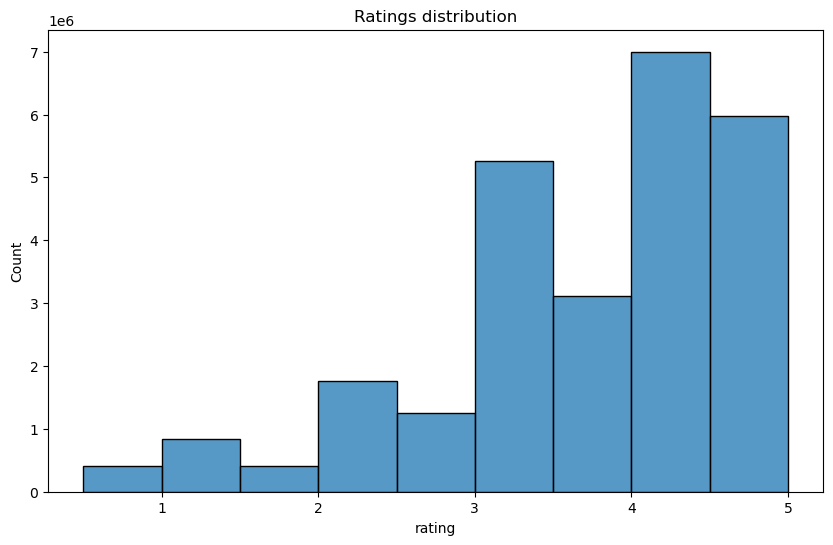

In [90]:
plt.figure(figsize=(10,6))
sns.histplot(df_ratings['rating'], bins=9)
plt.title('Ratings distribution')
plt.show()

- Rating scale is from 0.5 to 5.0 with 0.5 increments.
- Most ratings are 4.0 and 3.0.
- There are no ratings of 0
- The average rating is 3.53 which is slightly above the middle of the scale. This might be due to the fact that people are more likely to rate movies they like than movies they don't like or that people carefully select movies they watch, based on their interests.

## 3.1.1 Number of Ratings per User

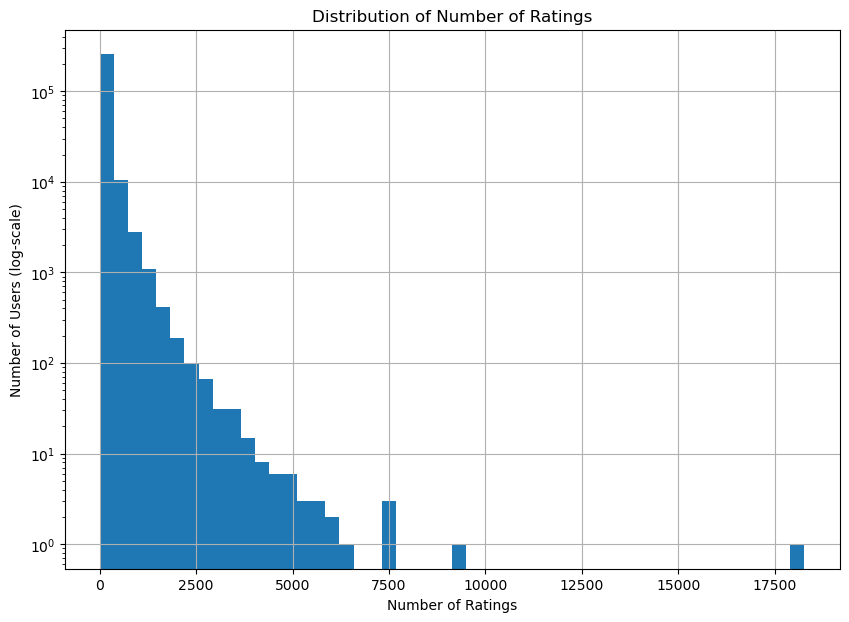

In [91]:
ratings_per_user = df_ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(10,7))
plt.hist(ratings_per_user.values, bins=50, log=True)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users (log-scale)')
plt.grid(True)
plt.show()

In [92]:
ratings_per_user.describe()

count      270896.0
mean      96.067454
std      205.719606
min             1.0
25%            15.0
50%            30.0
75%            93.0
max         18276.0
Name: rating, dtype: Float64

- The distribution of ratings per user is right-skewed
- Most users have rated less than 100 movies
- Maximum number of ratings by a user is 18276 (extremely high)
- Minimum number of ratings by a user is 1
- Average number of ratings per user is approximately 96

In [93]:
# Identify outliers using the Interquartile Range (IQR)
Q1 = ratings_per_user.quantile(0.25)
Q3 = ratings_per_user.quantile(0.75)
IQR = Q3 - Q1
outliers = ratings_per_user[(ratings_per_user < (Q1 - 1.5 * IQR)) | (ratings_per_user > (Q3 + 1.5 * IQR))]
outliers

userId
11         227
12         248
15         226
20         270
24         634
          ... 
270871     261
270872     234
270879     413
270887    2501
270896     260
Name: rating, Length: 30975, dtype: Int64

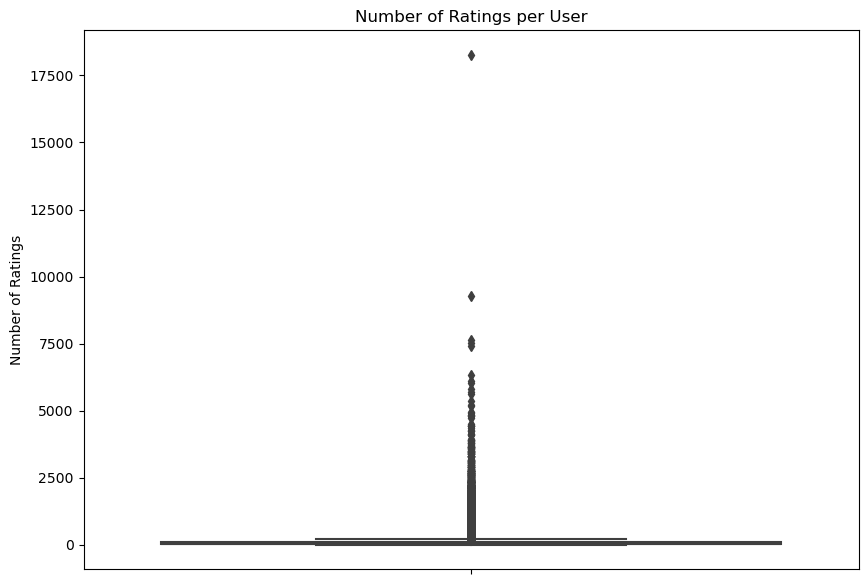

In [94]:
plt.figure(figsize=(10,7))
sns.boxplot(y=ratings_per_user, orient='v', data=None)
plt.title('Number of Ratings per User')
plt.ylabel('Number of Ratings')
plt.show()

After detecting the outliers, we can see that the distribution of ratings per user is right-skewed. Most users have rated less than 100 movies. The maximum number of ratings by a user is 18276 which could potentially be a bot, as it is extremely high. We will therefore drop this user from the dataset.

In [95]:
# Drop rows where userId is the user with the maximum number of ratings
user_with_max_ratings = ratings_per_user.idxmax()
df_ratings = df_ratings[df_ratings['userId'] != user_with_max_ratings]

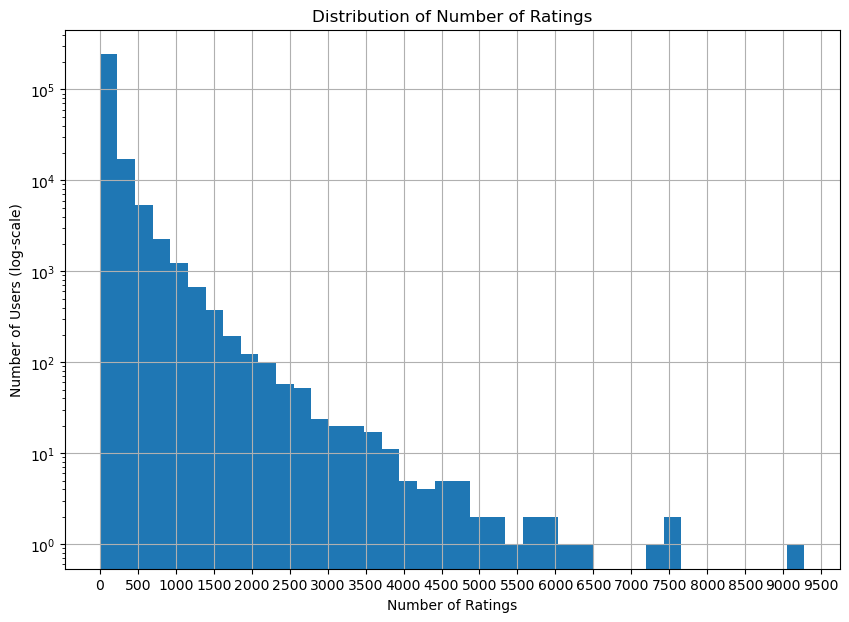

In [96]:
# Group by 'userId' and count the number of ratings for each user
ratings_per_user = df_ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(10,7))
plt.hist(ratings_per_user.values, bins=40, log=True)
plt.title('Distribution of Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users (log-scale)')
plt.xticks(range(0, ratings_per_user.max() + 500, 500))
plt.grid(True)
plt.show()

After removing the user with the maximum number of ratings, the distribution of ratings per user is still right-skewed. Most users have rated less than 100 movies. This corresponds with the typical behavior of users on movie rating platforms, where most users rate only a small fraction of the available movies.

We will now look at the distribution of ratings, below 100, to get a better understanding of the number of ratings per user.

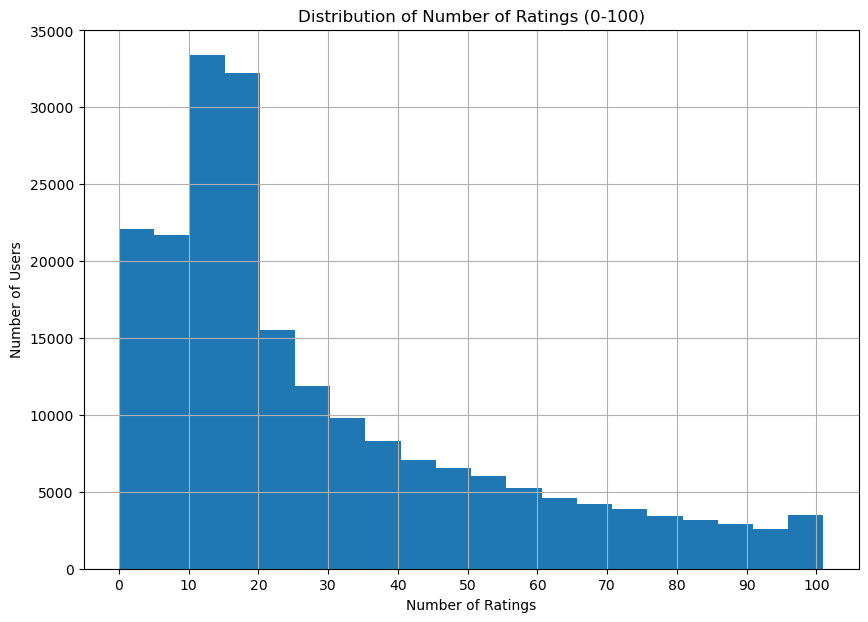

In [97]:
# Display the number of ratings for user below 100, as most users have rated less than 100 movies
ratings_per_user = df_ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(10,7))
plt.hist(ratings_per_user.values, bins=(20), range=(0, 101))
plt.title('Distribution of Number of Ratings (0-100)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.xticks(range(0, 101, 10))
plt.grid(True)
plt.show()

- The distribution of ratings per user is right-skewed, with many users having rated between 10-20 movies.
- However, too few ratings per user can lead to inaccurate recommendations in collaborative filtering algorithms. We will dive further into it.

In [98]:
# Number of users with 0 ratings and Number of users with less than 20 ratings
zero_rating = ratings_per_user[ratings_per_user == 0].count()
less_than_twenty_rating = ratings_per_user[ratings_per_user < 20].count()
zero_rating, less_than_twenty_rating

(0, 104452)

- There are 0 users with 0 ratings, which is good for a movie recommender system based on ratings
- However, there are 104,452 users with less than 20 ratings.

In [99]:
# percentage users with less than 20 ratings
percentage_users_less_than_20_ratings = (less_than_twenty_rating / ratings_per_user.count()) * 100
percentage_users_less_than_20_ratings

38.55811292198084

- Over 104,000 users submitted less than 20 ratings which is 38.55% of the total number of users. This could be a challenge for collaborative filtering algorithms, as they require a minimum number of ratings to make accurate predictions.
- We will therefore remove users with less than 20 ratings from the dataset. This will shrink our dataset but will improve the quality of recommendations. By focusing on users who have provided more ratings, we can increase the accuracy of the collaborative filtering algorithm.
- Additionally, users with very few ratings pose a challenge (cold start problem) for collaborative filtering methods.
- Scalability and Adaptability: The recommendation system should be scalable and adaptable. As more users cross the threshold of 20 ratings, they should be automatically incorporated into the dataset for model training. This might happen in a later step of the project.

Literature suggesting that users with less than 20 ratings should be removed:
Saadati, M., Shihab, S., & Rahman, M.S. (2019). Movie Recommender Systems: Implementation and Performance Evaluation. Access: https://arxiv.org/abs/1909.12749, Last Access: 01.04.2025.

In [100]:
# Drop users with less than 20 ratings
df_ratings = df_ratings.groupby('userId').filter(lambda x: len(x) >= 20)

Now we want to explore the distribution of ratings per user after removing users with less than 20 ratings.

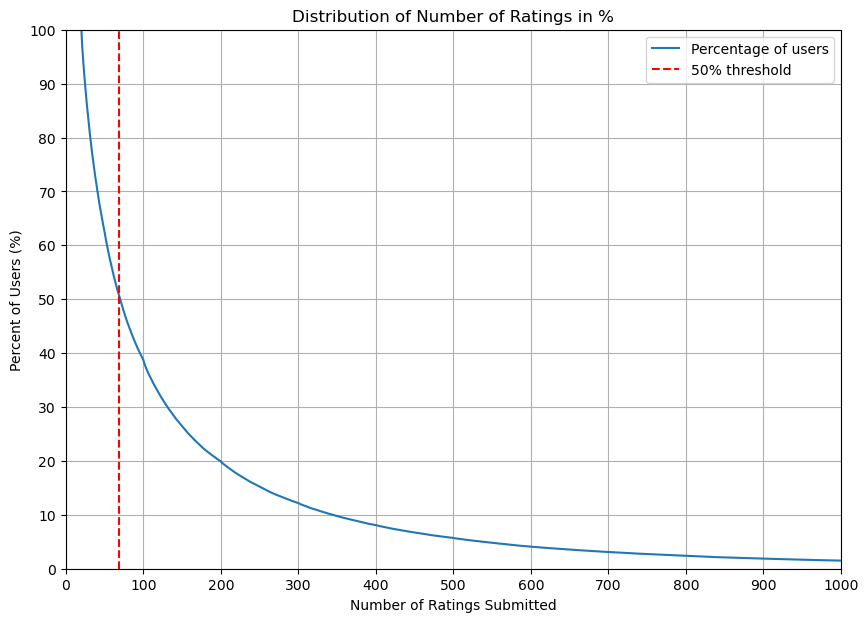

In [101]:
ratings_per_user = df_ratings.groupby('userId')['rating'].count()
max_ratings = 1000
thresholds = np.arange(1, max_ratings + 1)
percent_users = [100 * (ratings_per_user >= n).mean() for n in thresholds]
fifty_percent_threshold = next(x for x, val in enumerate(percent_users) if val <= 50)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(thresholds, percent_users, label='Percentage of users')
plt.axvline(x=fifty_percent_threshold, color='red', linestyle='--', label='50% threshold')
plt.xlabel('Number of Ratings Submitted')
plt.ylabel('Percent of Users (%)')
plt.title('Distribution of Number of Ratings in %')
plt.xticks(range(0, max_ratings + 1, 100))
plt.yticks(range(0, 101, 10))
plt.grid(True)
plt.legend()

# Adjust plot limits and ticks for better clarity
plt.xlim(0, max_ratings)
plt.ylim(0, 100)

plt.show()

- 50% of users have rated more than 70-80 movies
- Around 10% of users have even rated more than 350 movies
- We can conclude that the majority of users have rated a significant number of movies, which makes this dataset suitable for collaborative filtering algorithms.

Visualizing the distribution of ratings and some statistics on the ratings.

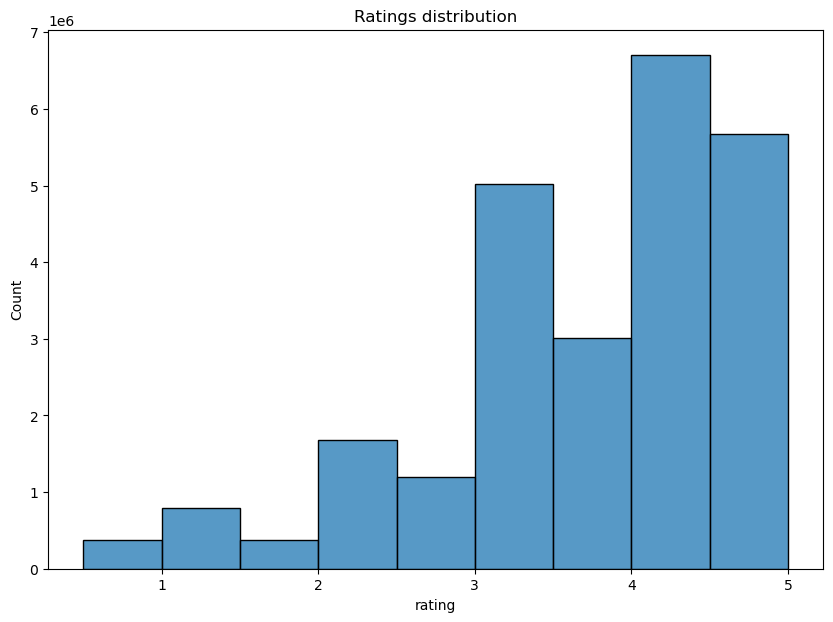

In [102]:
# Bi-model distribution of rating scores
plt.figure(figsize=(10, 7))
sns.histplot(df_ratings['rating'], bins=9)
plt.title('Ratings distribution')
plt.show()

In [103]:
ratings_statistics = df_ratings['rating'].describe()
ratings_statistics

count    24829828.0
mean        3.52898
std        1.060177
min             0.5
25%             3.0
50%             3.5
75%             4.0
max             5.0
Name: rating, dtype: Float64

We can observe that the distribution of ratings is bimodal, with peaks at 3.0 and 4.0. The average rating is 3.53, which is slightly above the middle of the scale. The 75th percentile is 4.0, which indicates that 75% of the ratings are 4.0 or below. We come to the conclusion that a movie can be considered as "good" if it has a rating of 4.0 or above.

We will now calculate the average rating for each user and add a column to indicate if the user liked the movie based on their average rating. We say that if the rating is greater than or equal to the user's average rating, then the user liked the movie.

In [104]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [105]:
# Calculate the average rating for each user
user_mean_ratings = df_ratings.groupby('userId')['rating'].mean().reset_index(name='user_mean_rating')
df_ratings = pd.merge(df_ratings, user_mean_ratings, on='userId')
df_ratings['liked_by_user'] = df_ratings['rating'] >= df_ratings['user_mean_rating']
df_ratings.head(50)

,userId,movieId,rating,timestamp,user_mean_rating,liked_by_user
0,1,110,1.0,2015-03-09 22:52:09,4.277778,False
1,1,147,4.5,2015-03-09 23:07:15,4.277778,True
2,1,858,5.0,2015-03-09 22:52:03,4.277778,True
3,1,1221,5.0,2015-03-09 22:52:26,4.277778,True
4,1,1246,5.0,2015-03-09 22:52:36,4.277778,True
5,1,1968,4.0,2015-03-09 23:02:28,4.277778,False
6,1,2762,4.5,2015-03-09 22:48:20,4.277778,True
7,1,2918,5.0,2015-03-09 22:53:13,4.277778,True
8,1,2959,4.0,2015-03-09 22:53:21,4.277778,False
9,1,4226,4.0,2015-03-09 23:03:48,4.277778,False


- This column will be useful for content-based filtering algorithms, as it provides information about the user's preferences and can be used to recommend movies that are similar to the ones the user liked.

## 3.1.2 Number of Ratings over Time

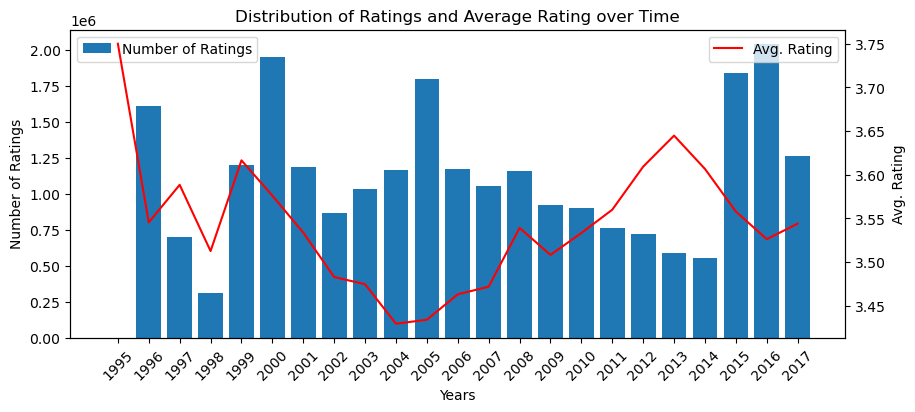

In [106]:
# Ratings by year
ratings_by_year = df_ratings.groupby(df_ratings['timestamp'].dt.strftime('%Y')).agg({'rating': ['count', 'mean']})
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()
ax1.bar(ratings_by_year.index, height=ratings_by_year.iloc[:,0], label='Number of Ratings')
ax1.legend(loc='upper left')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Ratings')
ax1.tick_params(axis='x', rotation=45)
ax2.plot(ratings_by_year.iloc[:,1], 'r', label='Avg. Rating')
ax2.legend(loc='upper right')
ax2.set_ylabel('Avg. Rating')
plt.title('Distribution of Ratings and Average Rating over Time');

- The number of ratings seem to fluctuate over time, with a peak around 2015 and a high rate of ratings in the following years. This could be due to the increasing popularity of online movie rating platforms and the rise of streaming services.

## 3.2 Movies

In [107]:
df_merged.head()

,movieId,belongs_to_collection,original_language,overview,release_date,runtime,title,actors,keywords_extracted,genre_extracted,production_company_extracted,production_country_extracted,spoken_language_extracted
0,1,1,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,81.0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,2,0,en,When siblings Judy and Peter discover an encha...,1995-12-15,104.0,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,3,1,en,A family wedding reignites the ancient feud be...,1995-12-22,101.0,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English]
3,4,0,en,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,127.0,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English]
4,5,1,en,Just when George Banks has recovered from his ...,1995-02-10,106.0,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English]


In [108]:
df_merged.describe()

,movieId,belongs_to_collection,release_date,runtime
count,41107.0,41107.000000,41107,41107.000000
mean,92990.535991,0.103462,1992-08-31 03:05:58.625051520,99.644270
min,1.0,0.000000,1906-12-26 00:00:00,45.000000
25%,40484.5,0.000000,1978-11-04 12:00:00,88.000000
50%,104506.0,0.000000,2001-07-26 00:00:00,96.000000
75%,142433.0,0.000000,2010-11-24 00:00:00,108.000000
max,176279.0,1.000000,2017-12-27 00:00:00,300.000000
std,57520.707821,0.304565,NaN,22.927994


- We dont observe any anomalies in the dataset

In [109]:
# Check for missing values
df_merged.isnull().sum()

movieId                         0
belongs_to_collection           0
original_language               0
overview                        0
release_date                    0
runtime                         0
title                           0
actors                          0
keywords_extracted              0
genre_extracted                 0
production_company_extracted    0
production_country_extracted    0
spoken_language_extracted       0
dtype: int64

- We dont have any missing values in the dataset, making it ready for analysis

## 3.2.1 Movies & Ratings per Genre

We will first transform the 'genre_extracted' column into a list of genres and then count the number of movies per genre and the popularity.

In [110]:
# Function to convert strings to lists or replace empty lists
def convert_or_replace(genre):
    if isinstance(genre, list):
        return genre if genre else ['(none)']
    elif isinstance(genre, str):
        try:
            return ast.literal_eval(genre)
        except ValueError:
            return ['(none)']
    else:
        return ['(none)']

# Apply the function to the 'genre_extracted' column
df_merged['genre_extracted'] = df_merged['genre_extracted'].apply(convert_or_replace)

df_merged.head(10)

,movieId,belongs_to_collection,original_language,overview,release_date,runtime,title,actors,keywords_extracted,genre_extracted,production_company_extracted,production_country_extracted,spoken_language_extracted
0,1,1,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,81.0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,2,0,en,When siblings Judy and Peter discover an encha...,1995-12-15,104.0,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,3,1,en,A family wedding reignites the ancient feud be...,1995-12-22,101.0,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English]
3,4,0,en,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,127.0,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English]
4,5,1,en,Just when George Banks has recovered from his ...,1995-02-10,106.0,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English]
5,6,0,en,"Obsessive master thief, Neil McCauley leads a ...",1995-12-15,170.0,Heat,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[robbery, detective, bank, obsession, chase, s...","[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],"[English, Español]"
6,7,0,en,An ugly duckling having undergone a remarkable...,1995-12-15,127.0,Sabrina,"[Harrison Ford, Julia Ormond, Greg Kinnear, An...","[paris, brother brother relationship, chauffeu...","[Comedy, Romance]","[Paramount Pictures, Scott Rudin Productions, ...","[Germany, United States of America]","[Français, English]"
7,8,0,en,"A mischievous young boy, Tom Sawyer, witnesses...",1995-12-22,97.0,Tom and Huck,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...",[],"[Action, Adventure, Drama, Family]",[Walt Disney Pictures],[United States of America],"[English, Deutsch]"
8,9,0,en,International action superstar Jean Claude Van...,1995-12-22,106.0,Sudden Death,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...","[terrorist, hostage, explosive, vice president]","[Action, Adventure, Thriller]","[Universal Pictures, Imperial Entertainment, S...",[United States of America],[English]
9,10,1,en,James Bond must unmask the mysterious head of ...,1995-11-16,130.0,GoldenEye,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...","[cuba, falsely accused, secret identity, compu...","[Adventure, Action, Thriller]","[United Artists, Eon Productions]","[United Kingdom, United States of America]","[English, Pусский, Español]"


In [111]:
# print columns
df_merged.columns

Index(['movieId', 'belongs_to_collection', 'original_language', 'overview',
       'release_date', 'runtime', 'title', 'actors', 'keywords_extracted',
       'genre_extracted', 'production_company_extracted',
       'production_country_extracted', 'spoken_language_extracted'],
      dtype='object')

In [112]:
# Unique Genres
all_genres = [genre for sublist in df_merged['genre_extracted'].tolist() for genre in sublist]
unique_genres_count = len(set(all_genres))
print(f'Total number of unique genres: {unique_genres_count}')

Total number of unique genres: 21


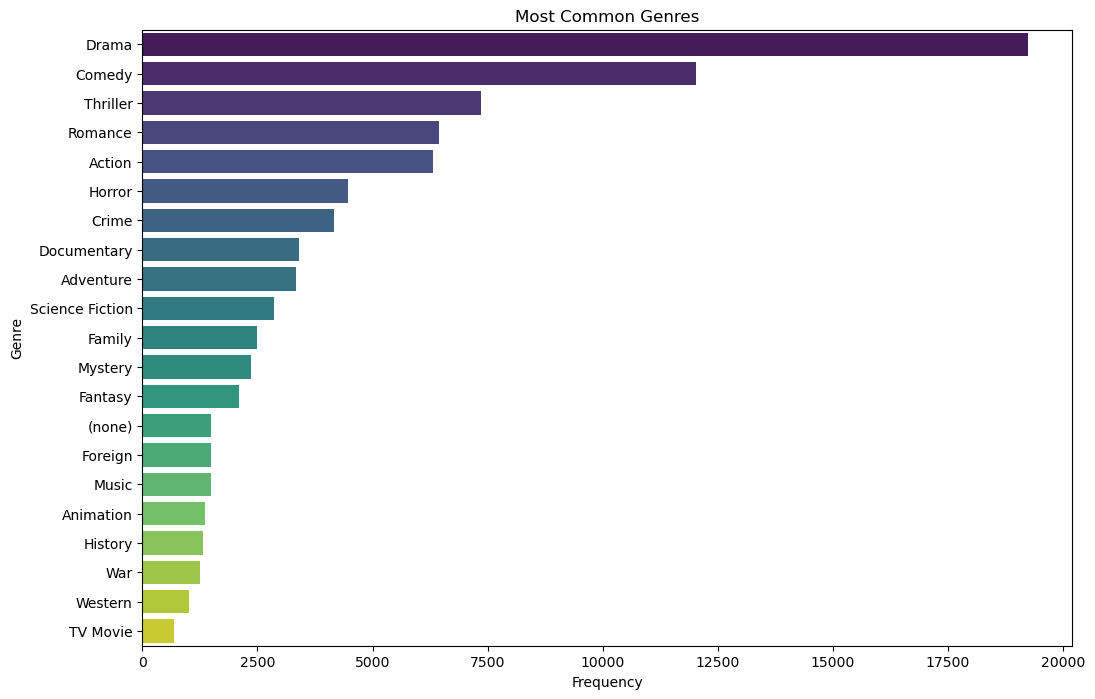

In [113]:
# Plot most Common Genres
genre_counts = df_merged['genre_extracted'].explode().value_counts()
top_genres = genre_counts
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Most Common Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

- Drama is the most common genre, followed by Comedy and Thriller.
- The least common genres are none (no Genres listed for those movies), Western, and TV Movie.
- The distribution of genres is right-skewed, with a few genres being very common and most genres being less common.
- This information can be useful for content-based filtering algorithms. The data suggests that this column has a valid distribution and could be potentially used in further analysis.

This distribution could be due to the fact that some genres are more often associated with other genres and more popular in general. For example, Drama is a very broad genre that can encompass many different types of movies, while War and Western movies are more niche genres that appeal to a smaller audience.

This information can be useful for content-based filtering algorithms, as it provides insights into the distribution of genres in the dataset.

We will now explore cross-tabulation of genres to see if "Drama" is most commonly associated with the second most common genre "Comedy" and the third most common genre "Thriller".

In [114]:
# Create a new DataFrame to hold our genre presence information
genre_presence = pd.DataFrame()

# Check for presence of each genre of interest
for genre in ['Drama', 'Comedy', 'Thriller']:
    genre_presence[genre] = df_merged['genre_extracted'].apply(lambda genres: genre in genres)

# Perform cross tabulation - count movies that are Drama and also belong to each of the other genres
cross_tabulation = pd.crosstab(index=genre_presence['Drama'],
                               columns=[genre_presence['Comedy'], genre_presence['Thriller']],
                               rownames=['Drama'],
                               colnames=['Comedy', 'Thriller'])

cross_tabulation

Comedy    False       True       
Thriller  False True  False True 
Drama                            
False     10228  3597  7625   414
True      12134  3124  3774   211

- There are 11,534 movies classified as Drama, but NOT as Comedy or Thriller.
- There are 3,060 movies classified as Drama and Thriller, but not as Comedy.
- There are 3,666 movies classified as Drama and Comedy, but not as Thriller.

The cross-tabulation shows that Drama is not always associated with Comedy or Thriller, but often. This suggests that the genres are not always mutually exclusive and that movies can belong to multiple genres. This information can be useful for content-based filtering algorithms, as it provides insights into the relationships between different genres.

We will now explore the distribution of ratings for each genre to see if there are any differences in the ratings for different genres.

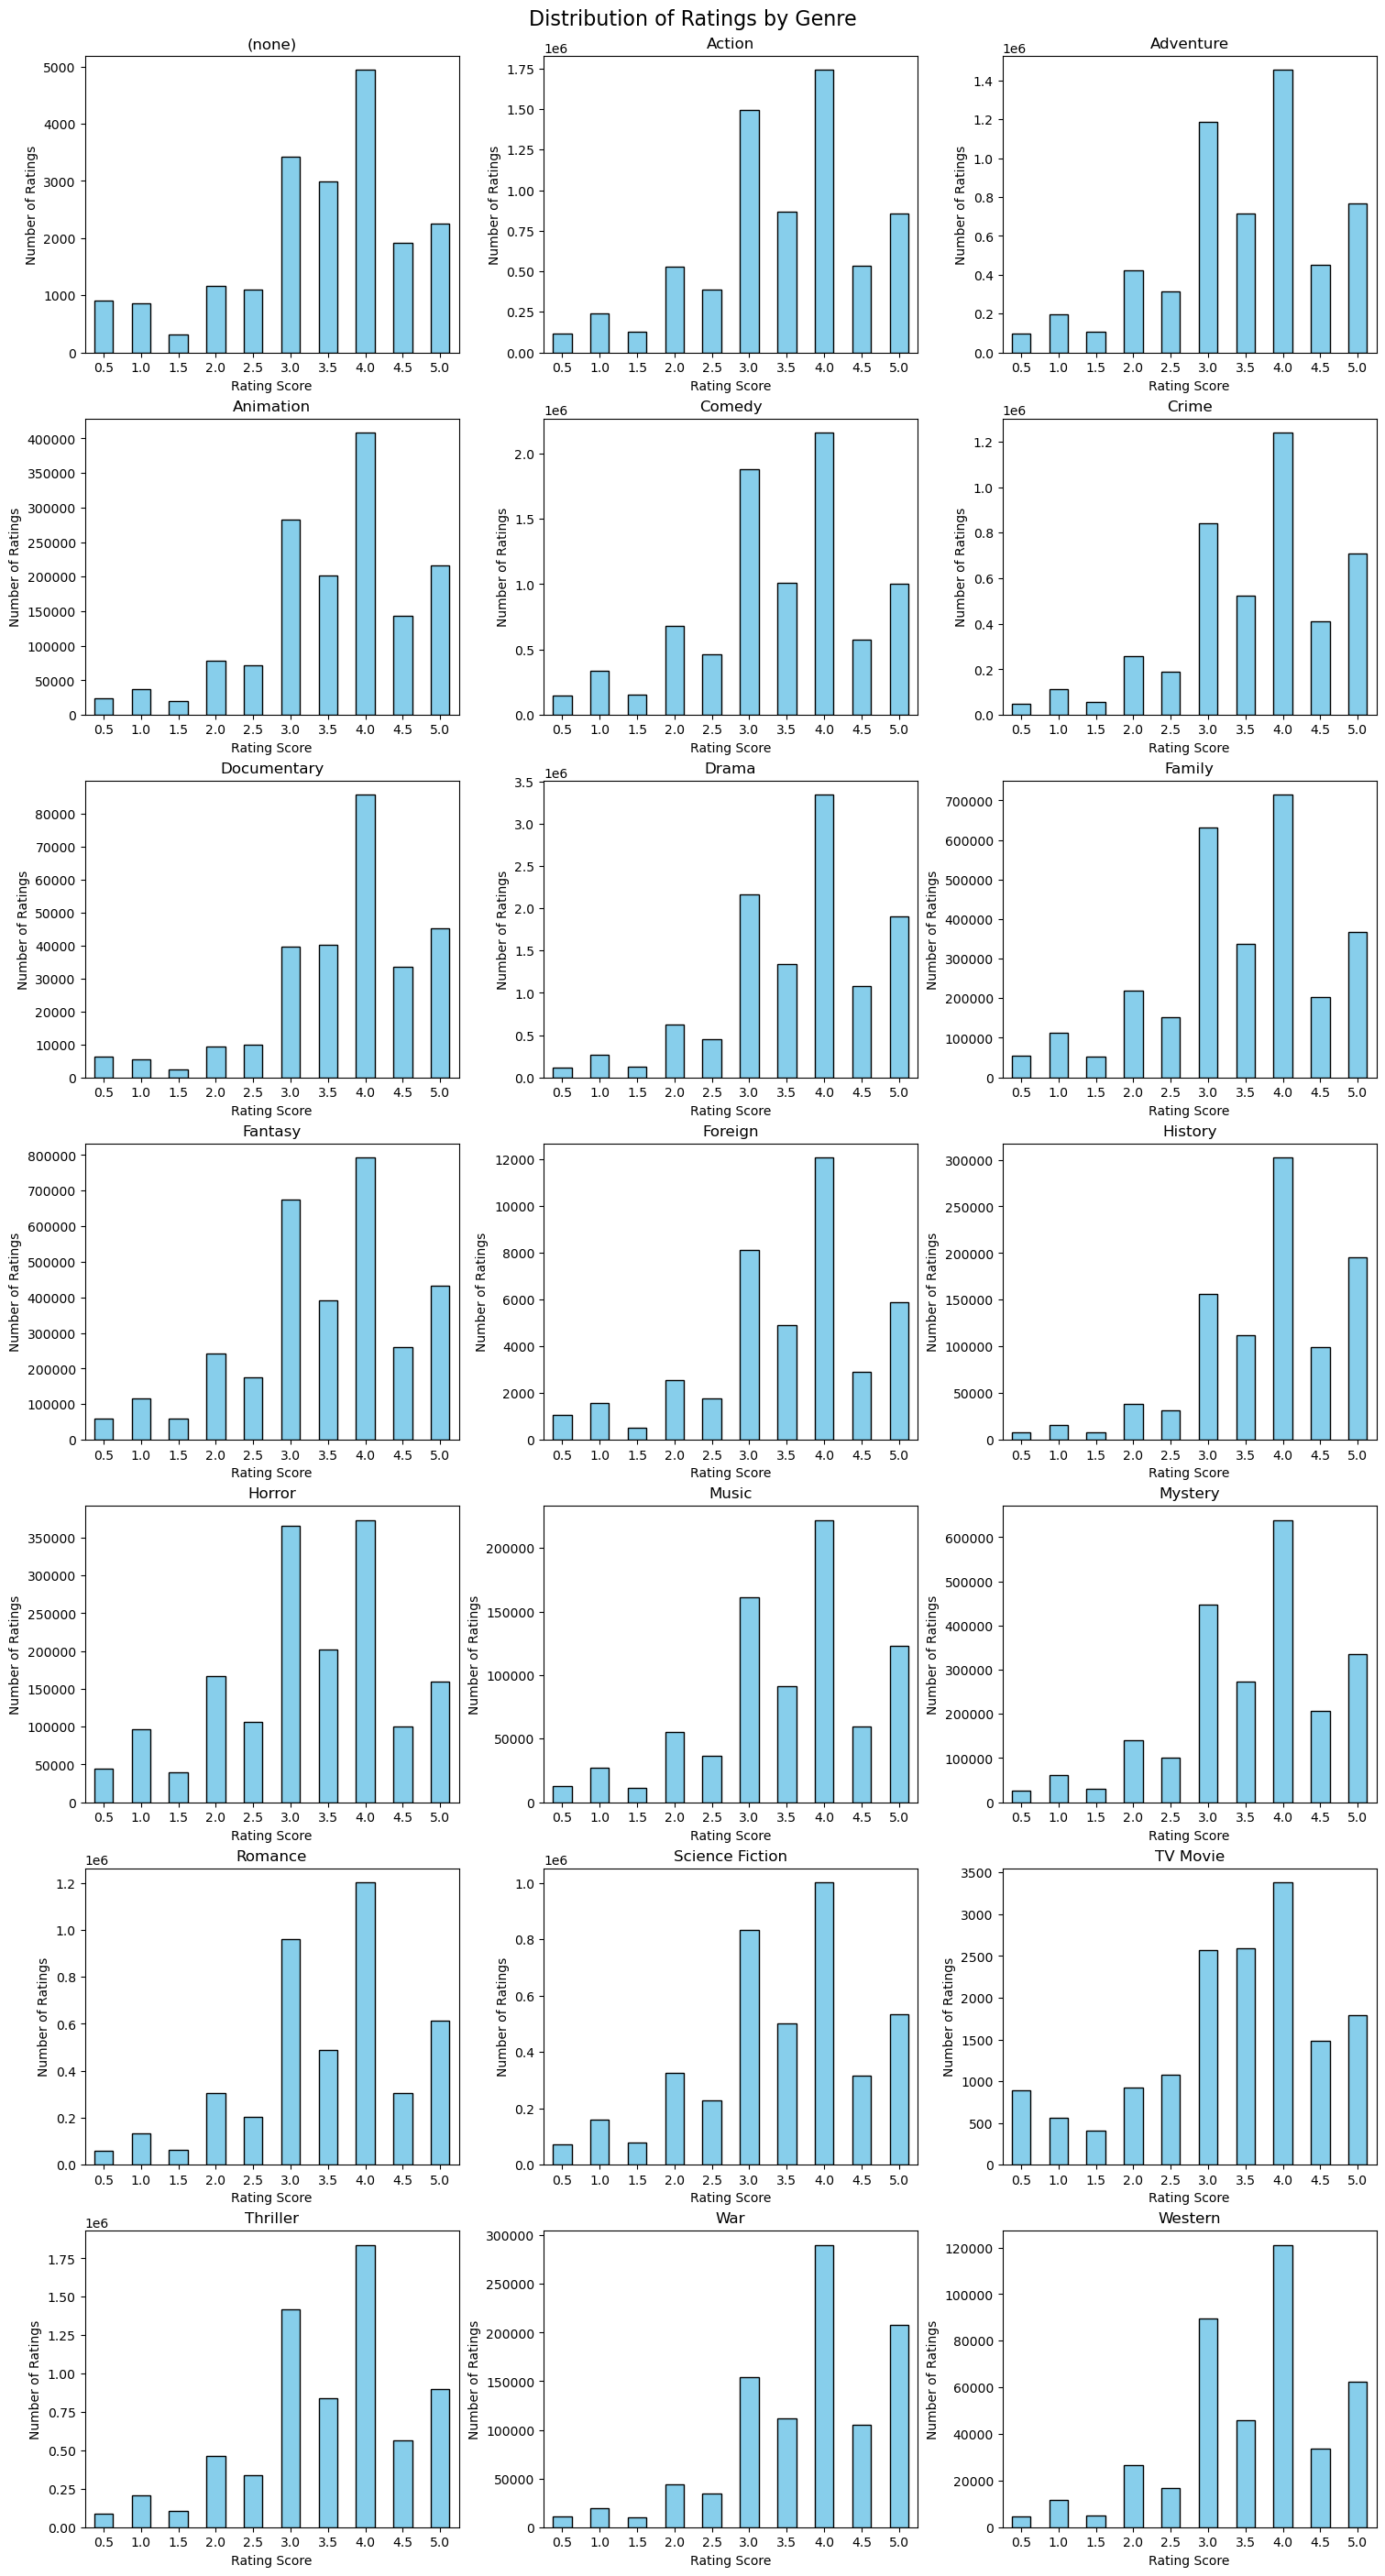

In [115]:
# Merge the ratings and movies dataframes on 'movieId'
genre_ratings = df_ratings.merge(df_merged[['movieId', 'genre_extracted']], on='movieId')

# Explode the 'genre_extracted' column to have one genre per row
genre_ratings = genre_ratings.explode('genre_extracted')

# Group the data by genre and rating to count the number of ratings for each score
rating_counts_by_genre = genre_ratings.groupby(['genre_extracted', 'rating']).size().unstack(fill_value=0)

# Get a list of unique genres for plotting
genres = rating_counts_by_genre.index.tolist()

n_cols = 3
n_rows = (len(genres) + n_cols - 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
axs = axs.flatten()

# Plot the distribution for each genre
for i, genre in enumerate(genres):
    # Select the current axis
    ax = axs[i]

    # Get the ratings counts for the current genre
    data = rating_counts_by_genre.loc[genre]

    # Create a bar plot
    data.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

    # Set the title and labels
    ax.set_title(genre)
    ax.set_xlabel('Rating Score')
    ax.set_ylabel('Number of Ratings')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Hide any unused subplots if the number of genres is less than the number of subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

# Add a main title
plt.suptitle('Distribution of Ratings by Genre', fontsize=16)

# Show the plot
plt.show()

- The distribution of ratings varies across genres, with some genres having more high ratings (e.g., War) and others having more low ratings (e.g., TV Movie).
- However, the overall distribution of ratings is quite similar across genres, with most ratings being in the 3.0 to 4.0 range. So considerably high.

## 3.2.2 Movies per Year

In [116]:
# See the range of years in the dataset
start_year = df_merged['release_date'].min()
end_year = df_merged['release_date'].max()

print(f"The dataset starts in the year: {start_year}")
print(f"The dataset ends in the year: {end_year}")

The dataset starts in the year: 1906-12-26 00:00:00
The dataset ends in the year: 2017-12-27 00:00:00


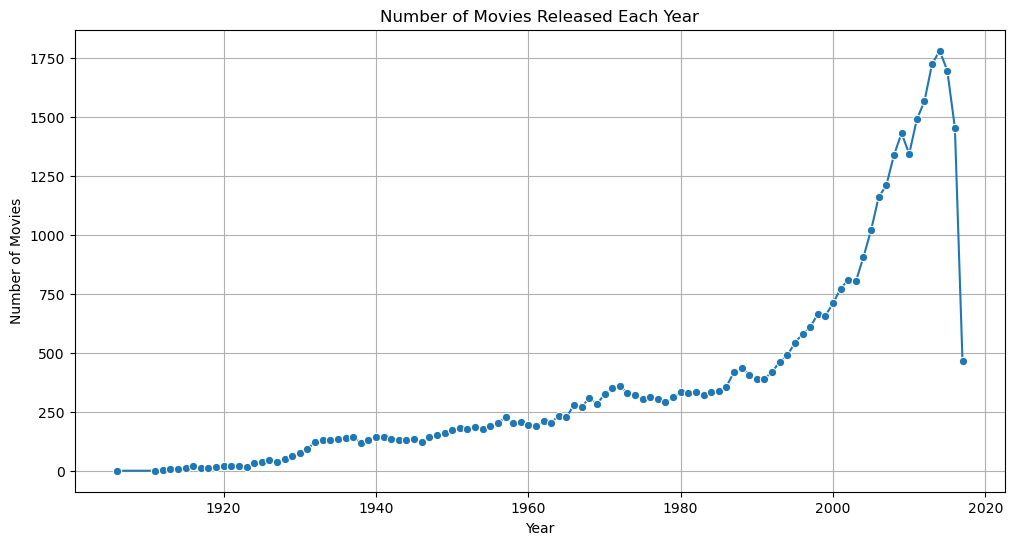

In [117]:
df_year = df_merged.copy()

# Extract the year from the 'release_date' column
df_year['year'] = pd.to_datetime(df_merged['release_date'], errors='coerce').dt.year

# Count the number of movies released each year
movies_per_year = df_year['year'].value_counts().sort_index()

# Plot the number of movies released each year
plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Early 20th Century (up to 1940s):
- Relatively few releases, likely due to the nascent state of the film industry and the technological limitations of the time.

Post-World War II Era (late 1940s to 1950s):
- A slight increase in movie releases could be attributed to the post-war economic boom and technological advancements in film production.

Steady growth up until late 1990s

Post-2000 to 2020s:
- The explosion in the number of releases may be linked to the rise of the internet, digital distribution, independent filmmaking, and the proliferation of digital platforms requiring content.
- Streaming services have also contributed to the increase in movie production and distribution.

The drop is due to the fact that the dataset only contains movies up until September 2017.

We will now analyze the Top 5 genres trends over time.

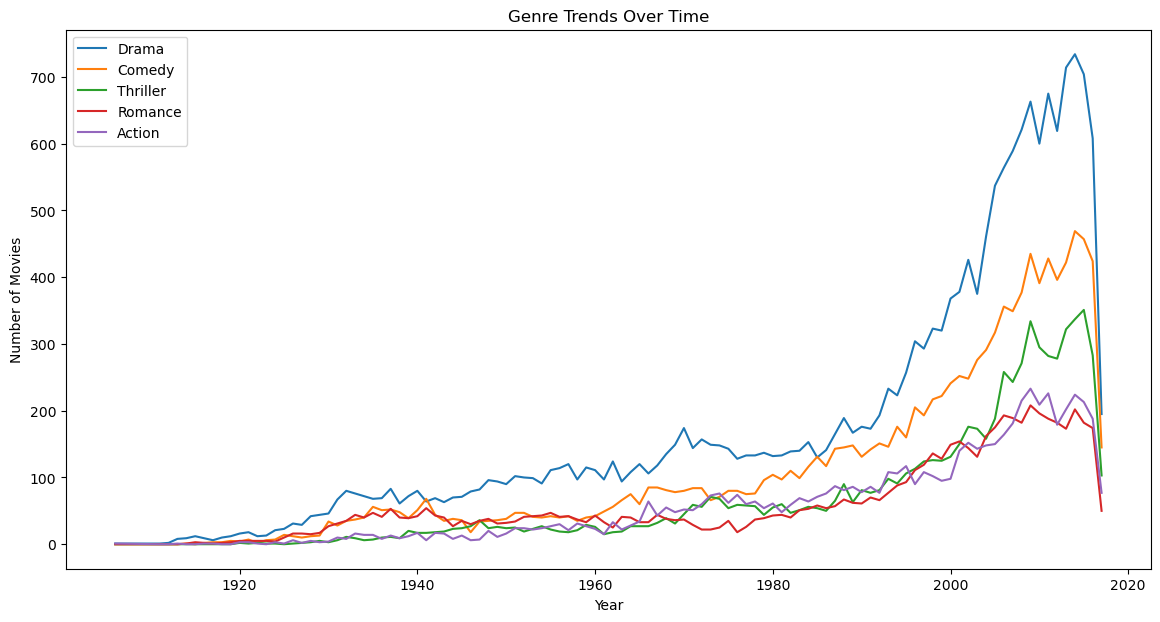

In [118]:
# Convert release_date to datetime and extract the year
df_merged['year'] = pd.to_datetime(df_merged['release_date']).dt.year

# Initialize a DataFrame to store genre counts by year
genre_trends = pd.DataFrame()

# List of genres to analyze
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action']

# Count the occurrence of each genre by year
for genre in genres:
    df_merged[genre] = df_merged['genre_extracted'].apply(lambda x: genre in x)
    genre_trends[genre] = df_merged.groupby('year')[genre].sum()

# Plotting the trends
plt.figure(figsize=(14, 7))

for genre in genres:
    plt.plot(genre_trends.index, genre_trends[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Genre Trends Over Time')
plt.legend()
plt.show()

- Drama is the most common genre throughout the years, followed by Comedy.
- The trend for Thriller movies seems to be increasing over time, while the trend for Action also increased but now stagnates, like Romance movies.

In [119]:
# Drop the columns created for the analysis (genres, year)
df_merged.drop(['year', 'Drama', 'Comedy', 'Thriller', 'Romance', 'Action'], axis=1, inplace=True)

## 3.2.3 Movie Keywords

In [120]:
# Function to convert strings to lists or replace empty lists
def convert_or_replace_keywords(keyword):
    if isinstance(keyword, list):
        return keyword if keyword else ['(none)']
    elif isinstance(keyword, str):
        try:
            return ast.literal_eval(keyword)
        except ValueError:
            return ['(none)']
    else:
        return ['(none)']

# Apply the function to the 'keywords_extracted' column
df_merged['keywords_extracted'] = df_merged['keywords_extracted'].apply(convert_or_replace_keywords)

df_merged.head(10)

,movieId,belongs_to_collection,original_language,overview,release_date,runtime,title,actors,keywords_extracted,genre_extracted,production_company_extracted,production_country_extracted,spoken_language_extracted
0,1,1,en,"Led by Woody, Andy's toys live happily in his ...",1995-10-30,81.0,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[jealousy, toy, boy, friendship, friends, riva...","[Animation, Comedy, Family]",[Pixar Animation Studios],[United States of America],[English]
1,2,0,en,When siblings Judy and Peter discover an encha...,1995-12-15,104.0,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[board game, disappearance, based on children'...","[Adventure, Fantasy, Family]","[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],"[English, Français]"
2,3,1,en,A family wedding reignites the ancient feud be...,1995-12-22,101.0,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[fishing, best friend, duringcreditsstinger, o...","[Romance, Comedy]","[Warner Bros., Lancaster Gate]",[United States of America],[English]
3,4,0,en,"Cheated on, mistreated and stepped on, the wom...",1995-12-22,127.0,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devi...","[based on novel, interracial relationship, sin...","[Comedy, Drama, Romance]",[Twentieth Century Fox Film Corporation],[United States of America],[English]
4,5,1,en,Just when George Banks has recovered from his ...,1995-02-10,106.0,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[baby, midlife crisis, confidence, aging, daug...",[Comedy],"[Sandollar Productions, Touchstone Pictures]",[United States of America],[English]
5,6,0,en,"Obsessive master thief, Neil McCauley leads a ...",1995-12-15,170.0,Heat,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[robbery, detective, bank, obsession, chase, s...","[Action, Crime, Drama, Thriller]","[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],"[English, Español]"
6,7,0,en,An ugly duckling having undergone a remarkable...,1995-12-15,127.0,Sabrina,"[Harrison Ford, Julia Ormond, Greg Kinnear, An...","[paris, brother brother relationship, chauffeu...","[Comedy, Romance]","[Paramount Pictures, Scott Rudin Productions, ...","[Germany, United States of America]","[Français, English]"
7,8,0,en,"A mischievous young boy, Tom Sawyer, witnesses...",1995-12-22,97.0,Tom and Huck,"[Jonathan Taylor Thomas, Brad Renfro, Rachael ...",[(none)],"[Action, Adventure, Drama, Family]",[Walt Disney Pictures],[United States of America],"[English, Deutsch]"
8,9,0,en,International action superstar Jean Claude Van...,1995-12-22,106.0,Sudden Death,"[Jean-Claude Van Damme, Powers Boothe, Dorian ...","[terrorist, hostage, explosive, vice president]","[Action, Adventure, Thriller]","[Universal Pictures, Imperial Entertainment, S...",[United States of America],[English]
9,10,1,en,James Bond must unmask the mysterious head of ...,1995-11-16,130.0,GoldenEye,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...","[cuba, falsely accused, secret identity, compu...","[Adventure, Action, Thriller]","[United Artists, Eon Productions]","[United Kingdom, United States of America]","[English, Pусский, Español]"


In [121]:
# Flatten all the lists in the 'keywords_extracted' column into a single list
all_keywords = [keyword for sublist in df_merged['keywords_extracted'].tolist() for keyword in sublist]

# Convert the flattened list into a set to remove duplicates and then count the unique elements
unique_keywords_count = len(set(all_keywords))

print(f'Total number of unique Keywords: {unique_keywords_count}')

Total number of unique Keywords: 19574


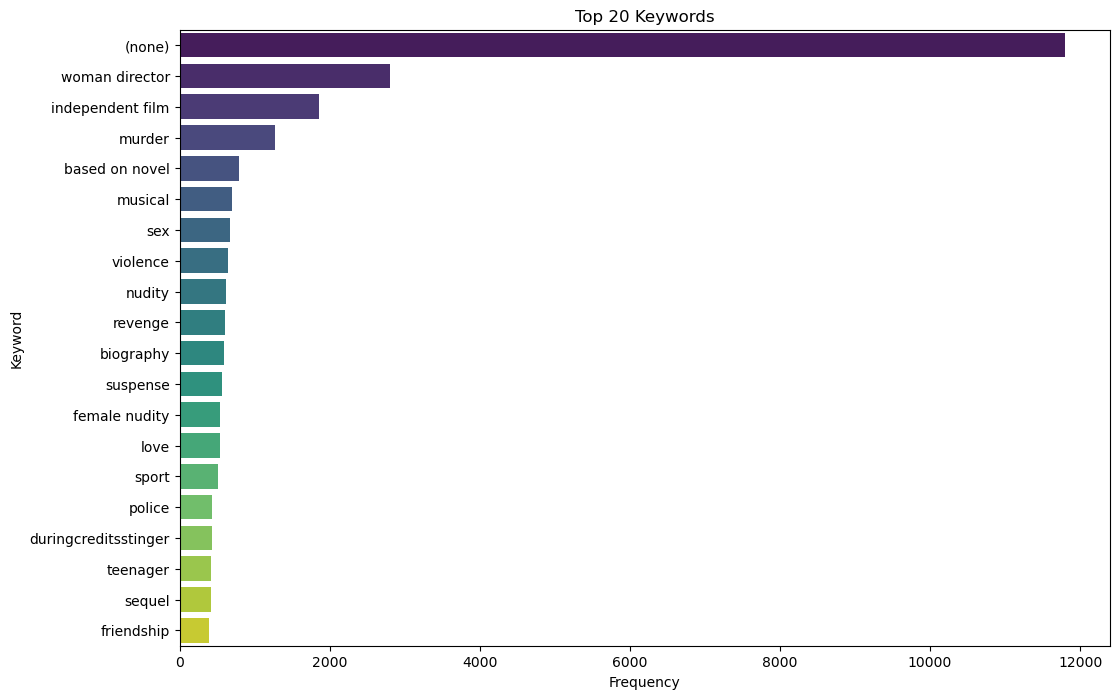

In [122]:
# Plot the top 20 keywords that were assigned to most movies
top_keywords = df_merged['keywords_extracted'].explode().value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='viridis')
plt.title('Top 20 Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

In [123]:
# Most frequent keywords in percentage (including 'none')
top_keywords_percentage = top_keywords / len(df_merged) * 100
top_keywords_percentage

keywords_extracted
(none)                  28.708006
woman director           6.826088
independent film         4.532075
murder                   3.079767
based on novel           1.926679
musical                  1.698008
sex                      1.629893
violence                 1.561778
nudity                   1.510692
revenge                  1.486365
biography                1.447442
suspense                 1.381760
female nudity            1.323376
love                     1.316078
sport                    1.233367
police                   1.065512
duringcreditsstinger     1.065512
teenager                 1.033887
sequel                   1.019291
friendship               0.965772
Name: count, dtype: float64

- The most common keyword is 'none' (27.5% of movies), which indicates that many movies do not have any keywords assigned to them.

We will exclude the 'none' keyword and plot the top 20 keywords that were assigned to most movies.

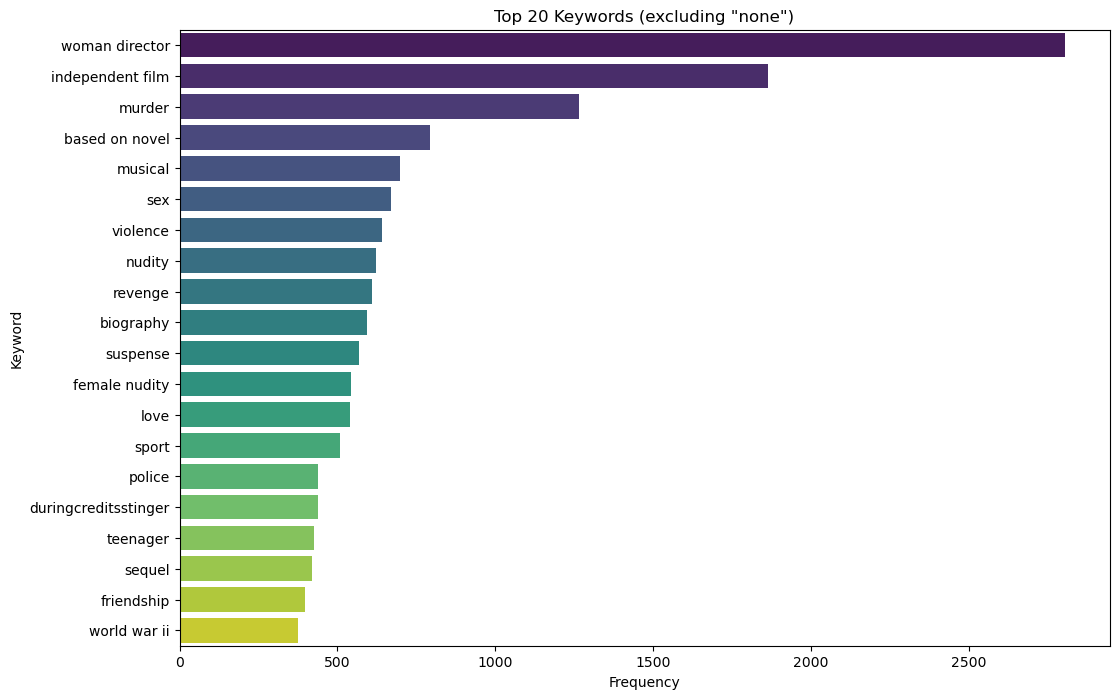

In [124]:
# Plot the top 20 keywords that were assigned to most movies without the 'none' keyword
top_keywords = df_merged['keywords_extracted'].explode().value_counts().head(21)[1:]

plt.figure(figsize=(12, 8))
sns.barplot(x=top_keywords.values, y=top_keywords.index, palette='viridis')
plt.title('Top 20 Keywords (excluding "none")')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.show()

- The most common keyword is 'woman director' which indicates that many movies are directed by women or that the movie industry is trying to promote diversity OR that consumers are interested in movies directed by women.
- The second most common keyword is 'independent film' which suggests that many movies in the dataset are independent films.
- Overall we can see that the keywords are quite diverse and cover a wide range of topics and themes.


In creating a movie recommendation system, it's wise to exclude movie records that contain 'none' in certain fields. This step is essential because we aim to ensure the system accurately understands and distinguishes between different movies. By using a TF-IDF analysis, which looks at how often words appear and how unique they are across movie descriptions, we can identify the most important keywords for each movie. However, if 'none' values are present, they could mistakenly cause some movies to seem similar when they're not. Removing these 'none' values helps in making the recommendations more precise and relevant to users' interests.

In [125]:
# Drop the "none" keyword from the keywords
df_merged['keywords_extracted'] = df_merged['keywords_extracted'].apply(lambda x: [keyword for keyword in x if keyword != '(none)'])

Top 3 Keywords per Genre (ignoring 'none' keyword)

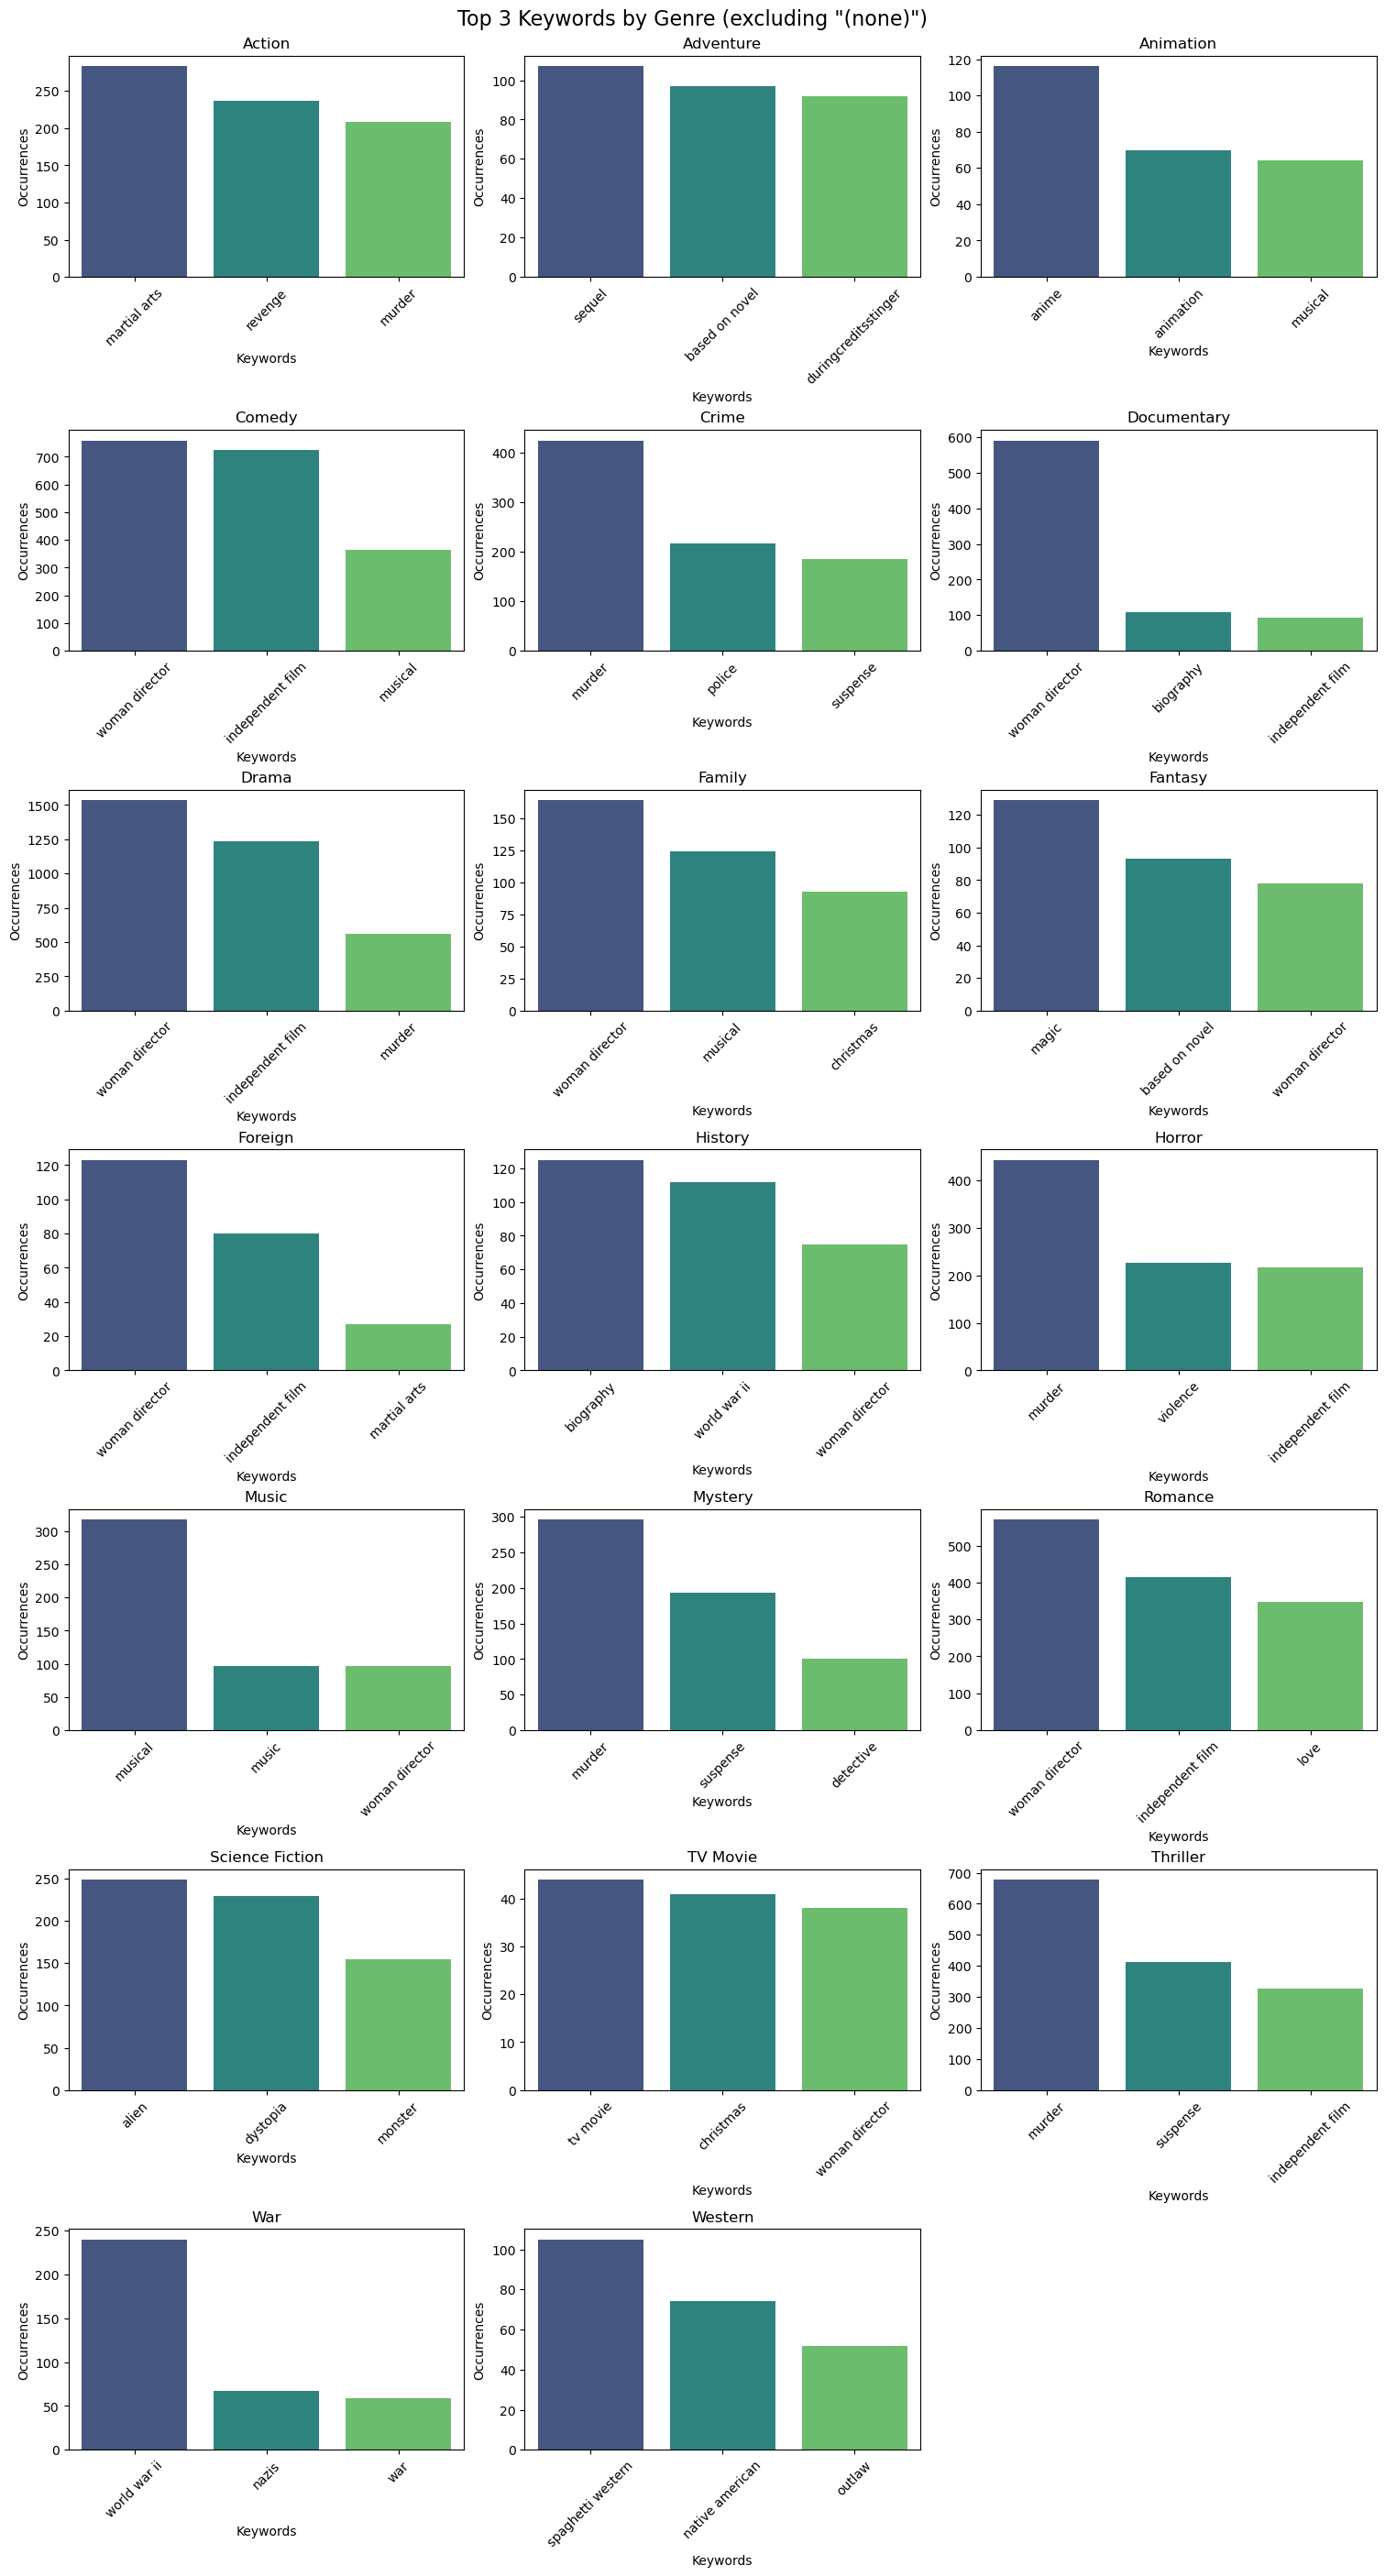

In [126]:
# Filter out rows where 'genre_extracted' is '(none)'
filtered_genre_keywords = df_merged[df_merged['genre_extracted'] != '(none)']

# Explode the DataFrame on the 'genre_extracted' and 'keywords_extracted' columns to have one genre and one keyword per row
filtered_genre_keywords = filtered_genre_keywords.explode('genre_extracted').explode('keywords_extracted')

# Now filter out the pseudo-keyword '(none)' from the keywords
filtered_genre_keywords = filtered_genre_keywords[filtered_genre_keywords['keywords_extracted'] != '(none)']

# Group by genre and keywords, count the occurrences, and get the top 3 for each genre.
top_keywords_by_genre = filtered_genre_keywords.groupby(['genre_extracted', 'keywords_extracted']).size().reset_index(name='count')
top_keywords_by_genre = top_keywords_by_genre.groupby('genre_extracted').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Get a list of unique genres for plotting (excluding '(none)')
unique_genres = top_keywords_by_genre['genre_extracted'].unique()
unique_genres = unique_genres[unique_genres != '(none)']

# Determine the layout for the subplots.
n_cols = 3
n_rows = int(np.ceil(len(unique_genres) / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), constrained_layout=True)

# Flatten the axes array for easy indexing.
axs = axs.flatten()

for i, genre in enumerate(unique_genres):
    if genre == '(none)':
        continue
    genre_data = top_keywords_by_genre[top_keywords_by_genre['genre_extracted'] == genre]
    sns.barplot(data=genre_data, x='keywords_extracted', y='count', ax=axs[i], palette='viridis')
    axs[i].set_title(f"{genre}")
    axs[i].set_xlabel('Keywords')
    axs[i].set_ylabel('Occurrences')
    axs[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots if the number of genres is not an exact multiple of the layout.
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.suptitle('Top 3 Keywords by Genre (excluding "(none)")', fontsize=16)
plt.show()


- **Consistent Themes**: Certain genres have strong thematic keywords that align with expectations, such as "alien" in Science Fiction and "war" in War.

- **Popular Elements**: Common elements like "love" and "murder" appear across multiple genres, indicating these themes' broad appeal and versatility.

- **Crossover Appeal**: Some keywords suggest a crossover of themes between genres, like "musical" appearing in both Family and Fantasy genres, indicating potential overlap in audience appeal.

- **Woman Director** seems to be a prominent keyword across different genres, indicating a high interest for this.

Now we do a quick rating comparison for movies with "woman director" keyword and those without:

In [127]:
# Rating Comparison for movies with "woman director" keyword and those without

# Filter the dataframe to create two separate dataframes
movies_with_woman_director = df_merged[df_merged['keywords_extracted'].apply(lambda x: 'woman director' in x)]
movies_without_woman_director = df_merged[df_merged['keywords_extracted'].apply(lambda x: 'woman director' not in x)]

# Merge with ratings dataframe
movies_with_woman_director = movies_with_woman_director.merge(df_ratings, on='movieId')
movies_without_woman_director = movies_without_woman_director.merge(df_ratings, on='movieId')

# Calculate the average rating for each dataframe
avg_rating_with = movies_with_woman_director['rating'].mean()
avg_rating_without = movies_without_woman_director['rating'].mean()

print(f"Average rating for movies with 'woman director' keyword: {avg_rating_with}")
print(f"Average rating for movies without 'woman director' keyword: {avg_rating_without}")

Average rating for movies with 'woman director' keyword: 3.422490338933683
Average rating for movies without 'woman director' keyword: 3.5321363972756306


- The average rating for movies with 'woman director' keyword does not seem to be significantly different from the average rating for movies without. Suggesting that the presence of a female director does not necessarily correlate with the quality of the movie.

## 3.2.4 Actors

Text(0.5, 0, 'Number of Movies Produced')

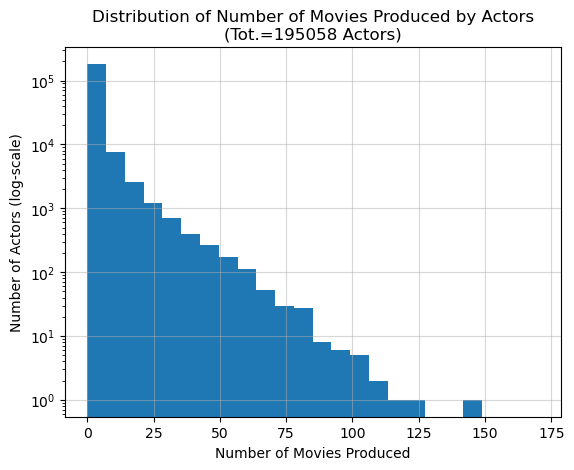

In [128]:
# Show distribution of actors participating in how many films
actors_df = df_merged[['actors']].explode('actors')
actors_df = actors_df.groupby('actors')[['actors']].count()
actors_df.columns = ['count']
actors_df = actors_df.sort_values('count', ascending=False)
fig, ax = plt.subplots()
plt.hist(actors_df, range=(0,170), bins=24)
plt.grid(alpha=.5)
plt.title(f"Distribution of Number of Movies Produced by Actors\n(Tot.={len(actors_df)} Actors)")
plt.yscale('log')
plt.ylabel('Number of Actors (log-scale)')
plt.xlabel('Number of Movies Produced')

The majority of actors have appeared in fewer than 5 films, as indicated by the tall bars on the left. There's a sharp decrease in the number of actors who have appeared in more films, which is characteristic of a "long-tail" distribution. A small number of actors have appeared in up to 120 movies, as shown by the bars to the right, indicating that very few actors have extremely high movie counts.

In [129]:
print("The Top 10 Most Productive Actors in the Dataset are:")
actors_df_10 = actors_df.head(10).reset_index()
actors_df_10.index = range(1,11)
actors_df_10

The Top 10 Most Productive Actors in the Dataset are:


,actors,count
1,Bess Flowers,240
2,Christopher Lee,145
3,John Wayne,124
4,Samuel L. Jackson,119
5,Michael Caine,110
6,John Carradine,109
7,Jackie Chan,105
8,Donald Sutherland,105
9,Frank Welker,101
10,Robert De Niro,101


In [130]:
# Quantiles for 'count' column in actors_df
quantiles = actors_df['count'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

# Create a formatted string for the output
quantile_output = "\n".join([f"{int(quantile * 100)}th percentile: {value:.0f} movie(s)"
                             for quantile, value in quantiles.items()])

print(quantile_output)

10th percentile: 1 movie(s)
25th percentile: 1 movie(s)
50th percentile: 1 movie(s)
75th percentile: 2 movie(s)
90th percentile: 5 movie(s)
95th percentile: 10 movie(s)
99th percentile: 27 movie(s)


90% of actors have appeared in 5 or fewer movies, highlighting a significant concentration of actors with a limited number of appearances. At the high end, the top 1% of actors have been in 26 or more movies, demonstrating a small proportion of actors with extensive filmographies compared to their peers.

## 3.2.5 Movie Runtime

Text(99, 14000, 'Mean: 99.6 min')

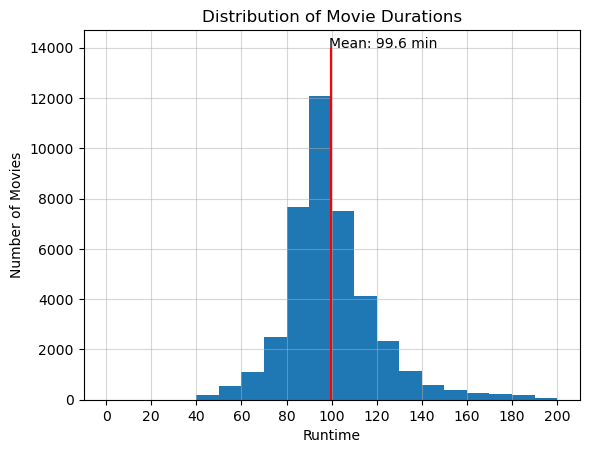

In [131]:
# PLot distribution of movie runtime
fig, ax = plt.subplots()
plt.hist(df_merged['runtime'], range=(0,200), bins=20)
plt.grid(alpha=.5)
plt.title('Distribution of Movie Durations')
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.xticks([n*20 for n in range(11)])
plt.vlines(np.mean(df_merged['runtime']), ymin=0, ymax=14000, color='red')
plt.annotate(f"Mean: {round(np.mean(df_merged['runtime']), 1)} min", xy=(99, 14000))

- Majority of movies have a runtime around the mean of 100 minutes, forming a roughly normal distribution as indicated by the bell shape of the histogram
- Tallest bin, signifying the most common runtime range, is centered around the mean, most movies in the dataset are close to 100 minutes long.

In [132]:
df_merged["runtime"].describe()

count    41107.000000
mean        99.644270
std         22.927994
min         45.000000
25%         88.000000
50%         96.000000
75%        108.000000
max        300.000000
Name: runtime, dtype: float64

- Shortest runtime of movies is 45 minutes
- Longest runtime of movies is 300 minutes
- 0.75 quantile is at 108 minutes

In [133]:
# Top 10 longest runtime movies
ten_longest_movies = df_merged.sort_values(by='runtime', ascending=False)[['title', 'runtime']].head(10)
print(ten_longest_movies)

                           title  runtime
42507        The Way We Live Now    300.0
40550                 Wild Palms    300.0
40153        Bytte Bytte Købmand    300.0
38878   Make Your Own Damn Movie    300.0
42113                 Persuasion    300.0
44549                 London Spy    300.0
18454                      Judex    300.0
44595            Planet Earth II    300.0
15239                 Wild China    300.0
34989  Musketeers 20 Years Later    300.0


In [134]:
# Apply Shapiro-Wilk ratio on runtime to check normality of distribution
runtime_data = df_merged['runtime'].values
stat, p_value = shapiro(runtime_data)
print(f'Statistics={stat}, p-value={p_value}')

Statistics=0.8589902041310694, p-value=3.293525338179901e-101


- Shapiro-Wilk ratio indicates a significant deviation from a normal distribution

In [135]:
# Correlation runtime and rating
correlation_runtime_rating = pd.merge(df_merged, df_ratings, on='movieId')
correlation = correlation_runtime_rating[['runtime', 'rating']].corr()
print(correlation)

          runtime    rating
runtime  1.000000  0.142731
rating   0.142731  1.000000


- Weak positive correlation between runtime and rating

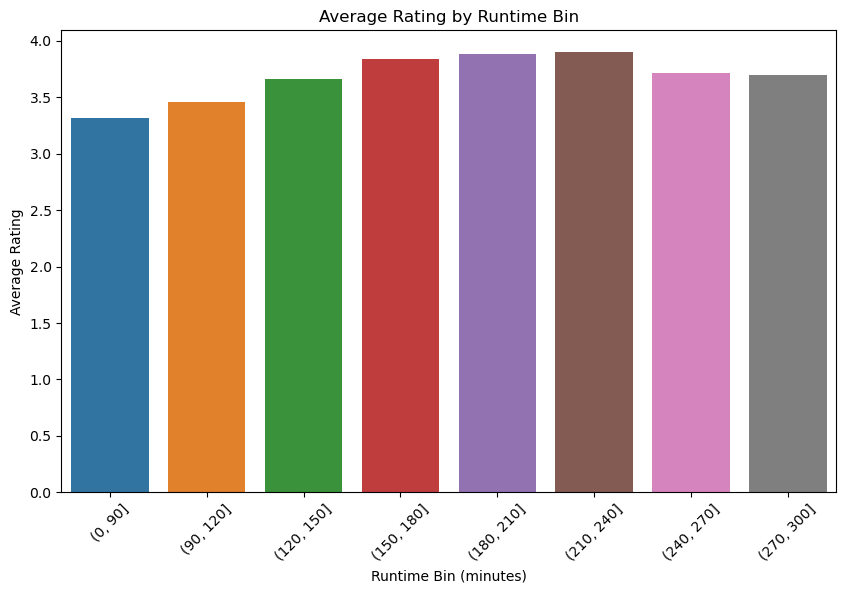

In [136]:
bins = [0, 90, 120, 150, 180, 210, 240, 270, 300]
correlation_runtime_rating['runtime_category'] = pd.cut(correlation_runtime_rating['runtime'], bins=bins)
runtime_rating_avg = correlation_runtime_rating.groupby('runtime_category')['rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=runtime_rating_avg, x='runtime_category', y='rating')
plt.xticks(rotation=45)
plt.title('Average Rating by Runtime Bin')
plt.xlabel('Runtime Bin (minutes)')
plt.ylabel('Average Rating')
plt.show()

- Close to an even distribution of average ratings among movie lengths suggesting none/weak correlation
- Movies with runtime between 180-240 minutes have the highest average rating

## 3.2.6 Production Countries

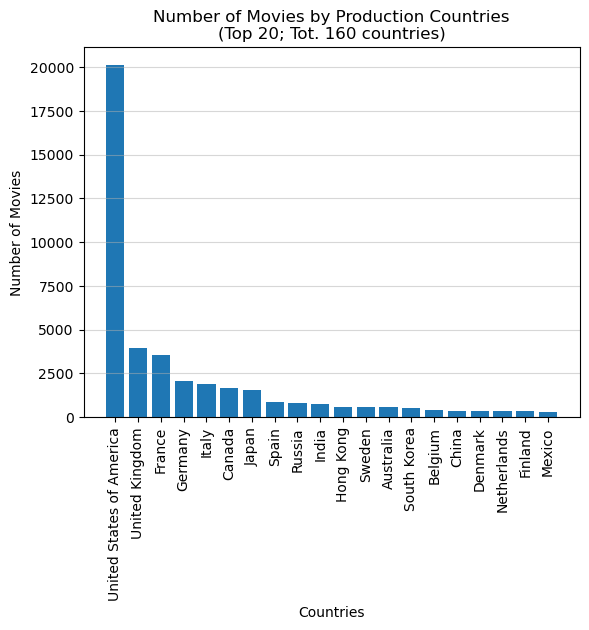

In [137]:
# Number of Movies per Production Country
countries_df = df_merged[['title', 'production_country_extracted']].explode('production_country_extracted')
countries_df = countries_df.groupby('production_country_extracted')['title'].count().sort_values(ascending=False)
plt.bar(x=countries_df.index[:20], height=countries_df[:20])
plt.title(f"Number of Movies by Production Countries\n(Top 20; Tot. {len(countries_df)} countries)")
plt.grid(axis='y', alpha=.5)
plt.ylabel('Number of Movies')
plt.xlabel('Countries')
plt.xticks(rotation=90);

- US is by far the country with most movies produced, followed by 4 European countries.
- The first Asian country, Japan, is seventh.

In [138]:
# Top 10 Countries producing the Longest Movies
exploded_df = df_merged.explode('production_country_extracted')
average_runtime_by_country = exploded_df.groupby('production_country_extracted')['runtime'].mean().sort_values(ascending=False)
print(average_runtime_by_country.head(10))

production_country_extracted
Libyan Arab Jamahiriya    182.666667
Kuwait                    177.000000
India                     140.601299
Malta                     134.222222
Bangladesh                128.500000
Belarus                   123.666667
Algeria                   122.500000
Ghana                     115.750000
Cyprus                    113.666667
Trinidad and Tobago       113.500000
Name: runtime, dtype: float64


## 3.2.7 Languages

In [139]:
df_merged.columns

Index(['movieId', 'belongs_to_collection', 'original_language', 'overview',
       'release_date', 'runtime', 'title', 'actors', 'keywords_extracted',
       'genre_extracted', 'production_company_extracted',
       'production_country_extracted', 'spoken_language_extracted'],
      dtype='object')

In [140]:
# Number of Movies per Language
languages_df = df_merged[['title', 'spoken_language_extracted']].explode('spoken_language_extracted')
languages_df = languages_df.groupby('spoken_language_extracted')['title'].count().sort_values(ascending=False)
languages_df

spoken_language_extracted
English            27328
Français            3834
Deutsch             2414
Español             2258
Italiano            2088
                   ...  
Malti                  3
Fulfulde               2
беларуская мова        2
ozbek                  2
Hausa                  1
Name: title, Length: 75, dtype: int64

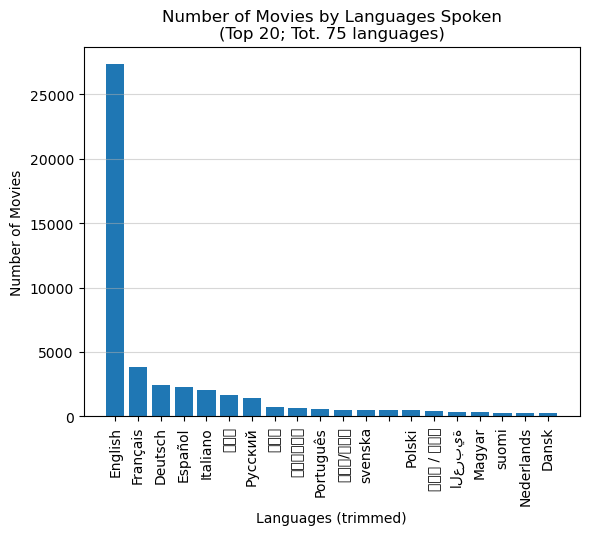

In [141]:
# Most spoken Languages
plt.bar(x=languages_df.index[:20], height=languages_df[:20])
plt.title(f"Number of Movies by Languages Spoken\n(Top 20; Tot. {len(languages_df)} languages)")
plt.grid(axis='y', alpha=.5)
plt.ylabel('Number of Movies')
plt.xlabel('Languages (trimmed)')
plt.xticks(rotation=90);

- The most common language is English, followed by French and German.
- The distribution of languages is right-skewed, with English obviously being the most common language and most movies being produced in USA and UK.

We try to find the most common genres per language.

In [142]:
# Most common Genre per Language
df_genres_exploded = df_merged.explode('genre_extracted')
df_languages_exploded = df_merged.explode('spoken_language_extracted')
top_genres = df_genres_exploded['genre_extracted'].value_counts().nlargest(10).index
top_languages = df_languages_exploded['spoken_language_extracted'].value_counts().nlargest(10).index
df_filtered = df_merged[df_merged['genre_extracted'].apply(lambda x: any(genre in x for genre in top_genres)) & df_merged['spoken_language_extracted'].apply(lambda x: any(language in x for language in top_languages))]
df_filtered = df_filtered.explode('genre_extracted')
df_filtered = df_filtered.explode('spoken_language_extracted')
crosstab_result = pd.crosstab(df_filtered['spoken_language_extracted'], df_filtered['genre_extracted'])
most_common_genre_per_language = crosstab_result.idxmax(axis=1)
most_common_genre_per_language

spoken_language_extracted
                     Drama
?????                Drama
??????               Drama
Afrikaans            Drama
Bahasa indonesia     Drama
                     ...  
ქართული              Drama
广州话 / 廣州話           Action
日本語                  Drama
普通话                  Drama
한국어/조선말              Drama
Length: 73, dtype: object

- The most common genre overall is Drama
- The column 'spoken_language_extracted' contains languages in their original names, which could be cleaned up for better analysis.

It also contains a language called Esperanto which is a constructed international auxiliary language, which was designed to have a simple and regular grammar, with a vocabulary primarily derived from Romance and Germanic language roots see https://en.wikipedia.org/wiki/Esperanto#:~:text=Esperanto%20(%2F%CB%8C%C9%9Bsp,%22%20(la%20Lingvo%20Internacia)

We will drop the column 'spoken_language_extracted' as it is not relevant for our analysis and it contains a lot of sparse data. Additionally, the column is kind of uniform with most movies being in English.

In [143]:
# Drop spoken_language_extracted column
df_merged.drop(['spoken_language_extracted'], axis=1, inplace=True)

## 3.2.8 Production Company

In [144]:
# Top 10 Production Companies with the highest Output
production_company_counter = Counter([company for companies_list in df_merged['production_company_extracted'] for company in companies_list])
top_10_companies = production_company_counter.most_common(10)
for company, count in top_10_companies:
    print(f"{company}: {count}")

Warner Bros.: 1222
Metro-Goldwyn-Mayer (MGM): 1062
Paramount Pictures: 990
Twentieth Century Fox Film Corporation: 828
Universal Pictures: 820
Columbia Pictures Corporation: 446
Columbia Pictures: 427
Canal+: 420
RKO Radio Pictures: 288
New Line Cinema: 276


- Code shows the top 10 production companies
- List is dominated by well-known, large studios with long history in fim industry
- List contains several studio variants (Columbia Pictures Corporation & Columbia Pictures). This could be due to company changing names over time or different divisions of the company itself.
- Canal+ is the only international presence on the list, but predominately American studios
- Results are congruent to the findings of Top 10 production countries dominated by USA

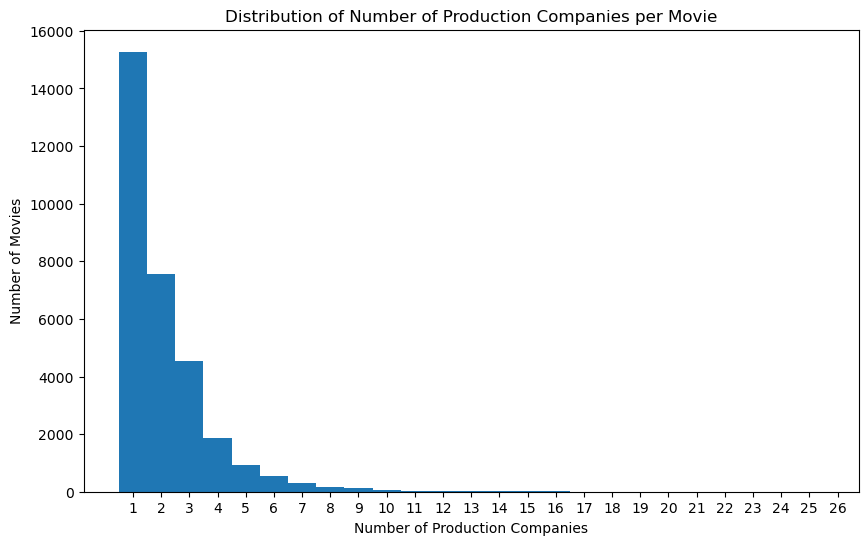

In [145]:
# Distribution of Numbers of Production Companies per Movie
num_companies_per_movie = df_merged['production_company_extracted'].apply(lambda x: len(x))
plt.figure(figsize=(10, 6))
plt.hist(num_companies_per_movie, bins=range(1, num_companies_per_movie.max() + 1), align='left')
plt.title('Distribution of Number of Production Companies per Movie')
plt.xlabel('Number of Production Companies')
plt.ylabel('Number of Movies')
plt.xticks(range(1, num_companies_per_movie.max() + 1))
plt.show()

- Majority of movies are produced by just one production company, with the number of movies sharply decreasing as the number of production companies increases
- Very few movies are produced by more than 5 companies, indicating that such collaborations are uncommon
- Distribution is heavily skewed to the left, suggesting that solo productions are the norm in the film industry

In [146]:
# Average movie rating of top 10 production companies
top_10_companies_data = production_company_counter.most_common(10)
top_10_companies = [company for company, count in top_10_companies_data]
average_ratings = df_ratings.groupby('movieId')['rating'].mean().reset_index(name='average_rating')
merged_with_ratings = pd.merge(df_merged, average_ratings, on='movieId', how='inner')
merged_with_ratings = merged_with_ratings.explode('production_company_extracted')
top_companies_ratings = merged_with_ratings[merged_with_ratings['production_company_extracted'].isin(top_10_companies)]
top_companies_avg_rating = top_companies_ratings.groupby('production_company_extracted')['average_rating'].mean().sort_values(ascending=False)
for company in top_10_companies:
    print(f"{company}: {top_companies_avg_rating.get(company)}")


Warner Bros.: 3.1318360065192965
Metro-Goldwyn-Mayer (MGM): 3.1163364469830155
Paramount Pictures: 3.1406056646754634
Twentieth Century Fox Film Corporation: 3.155879292512945
Universal Pictures: 3.077324034948302
Columbia Pictures Corporation: 3.0970445890889176
Columbia Pictures: 3.0840391022931777
Canal+: 3.2535807785529807
RKO Radio Pictures: 3.161696172352625
New Line Cinema: 2.9538265411203266


- Top 10 production companies typically have ratings in the lower to mid-3 range out of 5, decent but not outstanding performance
- This could be due to their high output, it seems they've got hits and misses alike
- Slightly better average ratings, Canal+ and United Artists might be hitting the mark more often than their peers, suggesting audiences might resonate more with their films

In [147]:
# Median Movie Rating of the Top 10 Production Companies
median_ratings = df_ratings.groupby('movieId')['rating'].median().reset_index(name='median_rating')
merged_with_ratings = pd.merge(df_merged, median_ratings, on='movieId', how='inner')
merged_with_ratings = merged_with_ratings.explode('production_company_extracted')
top_companies_ratings = merged_with_ratings[merged_with_ratings['production_company_extracted'].isin(top_10_companies)]
top_companies_median_rating = top_companies_ratings.groupby('production_company_extracted')['median_rating'].median().sort_values(ascending=False)
for company in top_10_companies:
    print(f"{company}: {top_companies_median_rating.get(company)}")

Warner Bros.: 3.0
Metro-Goldwyn-Mayer (MGM): 3.0
Paramount Pictures: 3.0
Twentieth Century Fox Film Corporation: 3.0
Universal Pictures: 3.0
Columbia Pictures Corporation: 3.0
Columbia Pictures: 3.0
Canal+: 3.5
RKO Radio Pictures: 3.25
New Line Cinema: 3.0


- Switching to median ratings cuts down on the noise from outliers, showing us that most of the big production companies typically land at a 3.0 rating
- It's a more leveled playing field with this view, revealing a kind of universal average experience for viewers, despite the diverse range of films

In [148]:
# Top 10 Production Companies according to highest Mean Movie Rating
average_ratings = df_ratings.groupby('movieId')['rating'].mean().reset_index(name='average_rating')
merged_data = pd.merge(df_merged, average_ratings, on='movieId')
company_ratings = merged_data.explode('production_company_extracted')
company_average_ratings = company_ratings.groupby('production_company_extracted')['average_rating'].mean().sort_values(ascending=False)
print(company_average_ratings.head(10))

production_company_extracted
Gail Force Films Inc.                        5.0
parma films                                  5.0
Evergreen Entertainment                      5.0
Fourth Culture Films                         5.0
Productions Bleu Blanc Rouge                 5.0
Corporation for Public Broadcasting (CPB)    5.0
One Small Instrument Pictures                5.0
Loud Mouth Films                             5.0
WinSome Productions                          5.0
Stormy Weathers Production                   5.0
Name: average_rating, dtype: Float64


In [149]:
# Production Company Name Variations
all_companies = [company for companies_list in df_merged['production_company_extracted'] for company in companies_list]
company_name_counter = Counter(all_companies)
print(f"Total unique company names: {len(company_name_counter)}")
counter = 0
for company, count in company_name_counter.most_common():
    variants = [comp for comp in company_name_counter if company in comp and company != comp]
    if variants:
        print(f"Variants of {company}: {variants}")
        counter += 1
        if counter == 15:
            break

Total unique company names: 22689
Variants of Warner Bros.: ['Warner Bros. Family Entertainment', 'Warner Bros. Pictures', 'Warner Bros. Animation', 'Warner Bros. Home Entertainment Group', 'Warner Bros. Feature Animation', 'Warner Bros. Television', 'Warner Bros. Pictures de España', 'Warner Bros. Entertainment', 'Warner Bros. Entertainment France', 'Warner Bros. Home Video', 'Warner Bros. Japan', 'Warner Bros. Entertainment Finland Oy', 'Warner Bros. Interactive Entertainment', 'Warner Bros. France', 'Warner Bros. Entertainment GmbH', 'Warner Bros. Pictures International']
Variants of Paramount Pictures: ['Paramount Pictures Corporation', 'Paramount Pictures (Canada)', 'Paramount Pictures Digital Entertainment']
Variants of Universal Pictures: ['Universal Pictures Co. Inc.', 'Universal Pictures Corporation', 'Universal Pictures International (UPI)', 'Universal Pictures France', 'MCA/Universal Pictures', 'Universal Pictures UK', 'Universal Pictures do Brasil', 'Universal Pictures Inte

- The production_company_extracted column could enhance our model by offering insights into production quality
- Wide variety and inconsistency among company names make it a worthless without a significant investment in data cleaning
- The wide variety of names is due to the fact that each production company has several divisions involved in the movie production
- With over 22,000 unique company names, including numerous variations for well-known ones, cleaning up would add more complexity than clarity, potentially overshadowing other important data
- The effort to streamline these names is huge, involving manual checks etc. We chose to focus our energies on more straightforward enhancements that directly boost model performance
- However, we will keep the column to decide upon model development

## 3.2.9 Belongs to Collection

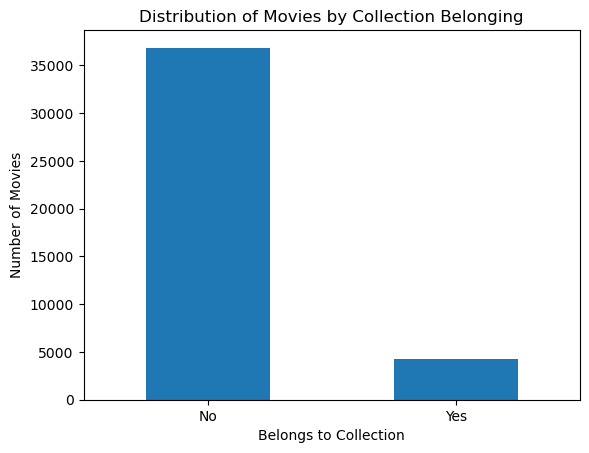

In [150]:
# Plot the Distribution of Movies belonging to a Collection
distribution = df_merged['belongs_to_collection'].value_counts()
distribution.plot(kind='bar')
plt.title('Distribution of Movies by Collection Belonging')
plt.xlabel('Belongs to Collection')
plt.ylabel('Number of Movies')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

- Vast majority of movies in the dataset aren't part of any collection, suggesting most films are stand-alone works rather than sequels or franchise entries
- Only a small fraction of the dataset consists of movies belonging to a collection, which could point to selective grouping or a focus on independent titles within the dataset

In [151]:
# Average Rating if Movie belongs to Collection
df_merged_with_ratings = pd.merge(df_merged, df_ratings, on='movieId')
average_ratings = df_merged_with_ratings.groupby('belongs_to_collection')['rating'].mean()
print("Average Ratings:\n", average_ratings)

Average Ratings:
 belongs_to_collection
0    3.570418
1    3.439206
Name: rating, dtype: Float64


- Films not part of a collection slightly outperform those in a collection with an average rating of 3.57 versus 3.44
- Stand-alone titles may resonate better with audiences or reflect a preference for originality
- Relatively close ratings, though, suggest that being part of a collection doesn't drastically affect a film's reception

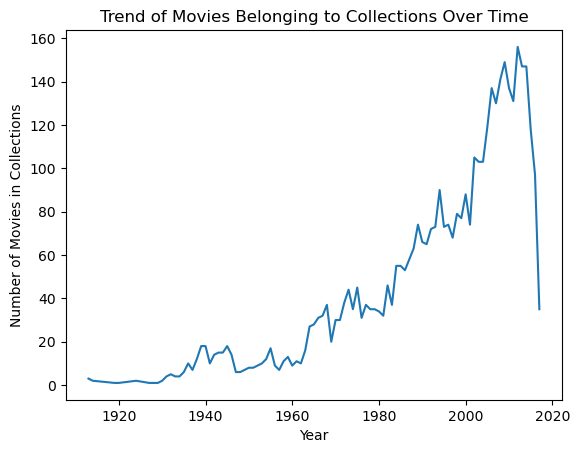

In [152]:
# Count the Number of Movies belonging to a Collection by Year
df_merged['year'] = pd.to_datetime(df_merged['release_date']).dt.year
collections_over_time = df_merged[df_merged['belongs_to_collection'] == 1].groupby('year').size()
collections_over_time.plot()
plt.title('Trend of Movies Belonging to Collections Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies in Collections')
plt.show()

- There's a clear upward trend in the number of movies being part of collections, especially from the 1980s onwards, peaking sharply in recent years, which might reflect the growing popularity of franchises and cinematic universes
- Sudden drop at the end could be attributed to incomplete data for the most recent year or a temporary shift in the movie industry's production patterns



## 3.3 Conclusion

- **Completeness**: The dataset is quite comprehensive and all adjustments to missing values, outliers etc. have been made. It contains a lot of ratings, crucial for collaborative filtering algorithms.
- **Consistency**: The data is consistent and well-structured, with no apparent inconsistencies or contradictions.
- **Correctness**: The data appears to be correct and accurate, with no obvious errors or biases.
- **Uniqueness**: The dataset is unique and values represent distinct movies, genres, actors, etc.
- **Timeliness**: The dataset is up-to-date as of September 2017, which is sufficient for our analysis and model development. However, it is always beneficial to have the most recent data available, which could be a limitation.
- **Stability**: The dataset is stable and unlikely to change over time, as it is historical data that does not require frequent updates. The source is reliable and so is the data is comparable among sources over time.
- **Relevance**: The dataset contains a wide variety of movies, genres, and keywords, making it highly relevant for our business case to develop a high quality recommendation system.
- **Contextualization**: The dataset is well-organized and structured, making it easy to understand and analyze. The columns are clearly labeled and the data is presented in a logical manner, including annotations and explanations where necessary.
- **Trustworthiness**: The dataset is from a reputable source, The Movie Database (TMDb), which is a popular movie and TV show database. The data is likely to be accurate and reliable.

The diverse range of genres and the detailed user ratings can be used to create personalized recommendations, while the large number of ratings can be used to find similar users and movies for collaborative filtering. This makes the dataset suitable for a hybrid recommendation approach that combines content-based and collaborative filtering methods.

Some potential challenges include handling sparse data in the 'keywords_extracted' column and dealing with the long-tail distribution of actors and genres. These challenges can be addressed through feature engineering to improve the quality of recommendations.

All insights learned from the EDA are valuable in the next step of building the features for the model training.

# 4 Modeling

## 4.1 Content-Based Recommendations

#### Textual Feature - Combined Text

In [156]:
df_merged['combined_text'] = df_merged.apply(lambda row: ' '.join([
    ' '.join(row['genre_extracted']), 
    ' '.join(row['actors']), 
    ' '.join(row['keywords_extracted']), 
    row['overview'], 
    ' '.join(row['production_company_extracted'])
]).lower(), axis=1)

The combined_text feature aggregates critical textual metadata from genres, actors, keywords, and movie descriptions into a single comprehensive descriptor for each movie. This aggregation captures the essence of a movie’s content, thematic elements, and appeal, which is crucial for content-based filtering. By synthesizing this information, the recommender system can identify and suggest movies with similar thematic and content attributes, enhancing personalization and user engagement.

#### Modeling Preprocessing

#### Combining df_ratings and df_merged

In [157]:
df_combined = pd.merge(df_ratings, df_merged, on='movieId', how='inner')

#### Setting Rating Threshold

The decision to set a threshold of 20 ratings for each movie before including it in the item-based recommender system is strategic, with the goal of ensuring the reliability and validity of the generated recommendations. This threshold acts as a quality control measure, weeding out movies with sparse feedback that could otherwise result in skewed or less confident recommendations due to insufficient user data. By setting this minimum, the system focuses on movies with a high level of viewer engagement, allowing recommendations to be built on a solid foundation of user feedback. This approach improves the system's ability to deliver accurate, trustworthy recommendations based on broad consensus rather than outliers or minimal feedback, resulting in a better user experience and increased overall credibility for the recommender system.

In [158]:
ratings_per_movie = df_combined.groupby('movieId').size()

movies_with_enough_ratings = ratings_per_movie[ratings_per_movie >= 20].index

df_item_modeling = df_combined[df_combined['movieId'].isin(movies_with_enough_ratings)]

print(f"Original dataset size: {df_combined.shape}")
print(f"Filtered dataset size: {df_item_modeling.shape}")

Original dataset size: (24651531, 19)
Filtered dataset size: (24536298, 19)


With the filtered dataset, df_item_modeling, now comprising 24.548.423 rows out of the original 24.669.326, it's evident that the vast majority of the data meets the threshold of having at least 20 ratings per movie. This minimal reduction in dataset size suggests that most movies in the dataset have a sufficient number of ratings, indicating robust user engagement across a wide range of movies.

##### Grouping Movies

In [159]:
df_grouped = df_item_modeling.groupby('movieId', as_index=False).agg({
    'title': 'first',
    'combined_text': 'first', 
})

df_grouped.head()

,movieId,title,combined_text
0,1,Toy Story,animation comedy family tom hanks tim allen do...
1,2,Jumanji,adventure fantasy family robin williams jonath...
2,3,Grumpier Old Men,romance comedy walter matthau jack lemmon ann-...
3,4,Waiting to Exhale,comedy drama romance whitney houston angela ba...
4,5,Father of the Bride Part II,comedy steve martin diane keaton martin short ...


### 4.1.1 Baseline Model

The BaselineContentRecommender is intended to make movie recommendations based on content similarities. It uses a Term Frequency-Inverse Document Frequency (TF-IDF) vectorization technique to analyze movies' "combined_text" content and convert it into numerical data. The TF-IDF model emphasizes key words that are unique to a movie's description. Vectorizing the combined_text using TF-IDF transforms qualitative textual information into quantitative vectors, facilitating the measurement of content similarity between movies. After calculating the TF-IDF matrix for the provided movie descriptions, the model computes cosine similarity scores for all movies, resulting in a similarity matrix. When a recommendation is requested for a specific movie, the model uses the movie's ID to locate its index in the similarity matrix and retrieves its similarity scores to all other movies. It then chooses the top N movies with the highest similarity scores for recommendations. These recommended movies are sorted by their cosine similarity to the query movie, ensuring that the most similar content appears first. This baseline content-based recommender provides a straightforward approach to movie recommendation by leveraging the content features (keywords, genres, overview, ...) embedded in the movies' textual data.

In [160]:
class BaselineContentRecommender:
    def __init__(self, movies_df, k=100):
        self.movies_df = movies_df.copy()
        self.movies_df['movieId'] = self.movies_df['movieId'].astype(str)
        self.movie_id_to_index = {movie_id: i for i, movie_id in enumerate(self.movies_df['movieId'])}
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
        self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(df_grouped['combined_text'])
        self.similarity_matrix = cosine_similarity(self.tfidf_matrix)

    def recommend(self, movie_id, top_n=10):
        movie_id = str(movie_id)
        if movie_id not in self.movie_id_to_index:
            print(f"Movie ID {movie_id} not found in the dataset.")
            return []
        
        movie_index = self.movie_id_to_index[movie_id]
        similarity_scores = self.similarity_matrix[movie_index]
        top_k_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]
        recommendations = self.movies_df.iloc[top_k_indices].copy()
        recommendations['cosine_similarity'] = similarity_scores[top_k_indices]
        
        return recommendations.sort_values('cosine_similarity', ascending=False)

In [161]:
recommender_base = BaselineContentRecommender(df_grouped, k=100)
recommendations_base1 = recommender_base.recommend('1', top_n=10)  
print(recommendations_base1[['movieId', 'title', 'cosine_similarity']])

      movieId            title  cosine_similarity
2874     3114      Toy Story 2           0.498247
11944   78499      Toy Story 3           0.419944
1722     1920   Small Soldiers           0.217253
2048     2253             Toys           0.185127
7105     7987            Dolls           0.180394
12270   83219  The Pixar Story           0.177778
1552     1707     Home Alone 3           0.166618
1793     1991     Child's Play           0.151372
9612    46948    Monster House           0.144776
1795     1993   Child's Play 3           0.143339


In [162]:
recommendations_base2 = recommender_base.recommend('2', top_n=10)  
print(recommendations_base2[['movieId', 'title', 'cosine_similarity']])

      movieId                             title  cosine_similarity
8536    27884                         Word Wars           0.247295
5852     6304                         Brainscan           0.164506
9471    44731                        Stay Alive           0.144454
14315  113889  Angry Video Game Nerd: The Movie           0.143253
9334    42725                     Grandma's Boy           0.142676
13264   97913                    Wreck-It Ralph           0.139110
7414     8633              The Last Starfighter           0.132776
15216  139847                         Chevalier           0.131848
8276    26985                           Nirvana           0.131047
14403  115534                             Ouija           0.127707


### 4.1.2 Advanced Model 

Following the development of the baseline model, the next step is to delve deeper into feature engineering to improve model performance and complexity. This entails creating new features such as weighted score, movie age, and sentiment polarity, which add layers of information to the basic content similarities captured by TF-IDF vectorization. These new features are intended to capture more nuanced aspects of the films, such as reception (weighted score), relevance over time (movie age), and emotional tone (sentiment polarity). By incorporating these features, the model can provide a more sophisticated analysis of movie similarities, looking beyond textual content to consider factors that may influence a viewer's preference. The model's core concept of relying on TF-IDF vectorization remains unchanged, but it has been enhanced with new features that improve the model's ability to recommend movies that are not only similar in content but also align with users' preferences in other dimensions. This approach represents a step toward developing a more advanced and comprehensive recommendation system.

### Feature Engineering

#### Weighted Score 

In [163]:
movie_stats = df_ratings.groupby('movieId').agg(average_rating=('rating', 'mean'), rating_count=('rating', 'count')).reset_index()

C = movie_stats['average_rating'].mean()
m = movie_stats['rating_count'].quantile(0.90)

def weighted_rating(x, m=m, C=C):
    v = x['rating_count']  
    R = x['average_rating'] 
    return (v/(v+m) * R) + (m/(m+v) * C)

movie_stats['weighted_score'] = movie_stats.apply(weighted_rating, axis=1)

df_ratings = df_ratings.merge(movie_stats[['movieId', 'weighted_score']], on='movieId', how='left')

df_ratings = df_ratings.merge(movie_stats[['movieId', 'average_rating', 'rating_count']], on='movieId', how='left')

print(df_ratings.head())

   userId  movieId  rating           timestamp  user_mean_rating  \
0       1      110     1.0 2015-03-09 22:52:09          4.277778   
1       1      147     4.5 2015-03-09 23:07:15          4.277778   
2       1      858     5.0 2015-03-09 22:52:03          4.277778   
3       1     1221     5.0 2015-03-09 22:52:26          4.277778   
4       1     1246     5.0 2015-03-09 22:52:36          4.277778   

   liked_by_user  weighted_score  average_rating  rating_count  
0          False        4.000094        4.010733         62331  
1           True        3.512328        3.581926          4559  
2           True        4.319463        4.336492         52236  
3           True        4.237402        4.261738         34162  
4           True        3.888237        3.911579         25011  


The weighted score combines a movie's average rating (vote_average) and the number of ratings (vote_count) it has received to provide a balanced metric that reflects both popularity and quality. This approach mitigates the bias towards movies with a high average rating but a low number of ratings, ensuring that the recommendations are not only high-quality but also broadly appreciated. For a movie recommender system, integrating the weighted score helps prioritize movies that have proven appeal, aligning recommendations with broader viewer satisfaction.

#### Movie Age

In [164]:
current_year = datetime.datetime.now().year

df_merged['movie_age'] = current_year - pd.to_datetime(df_merged['release_date']).dt.year

Calculating the movie_age from the release date provides insight into the recency and potential cultural relevance of a movie. In the context of a movie recommender system, this allows for temporal filtering and trend analysis, enabling recommendations that cater to preferences for newer releases or classic films. Understanding movie age is essential for aligning recommendations with temporal viewing trends and user preferences for contemporary versus classic cinema.

#### Sentiment Analysis of Overview

In [165]:
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None 

df_merged['sentiment_polarity'] = df_merged['overview'].apply(get_sentiment)

Performing sentiment analysis on movie descriptions yields a sentiment_polarity score, offering a nuanced view of the emotional tone or mood conveyed by the movie's narrative. This feature is particularly important for recommending movies that match a user’s emotional preferences or current mood, adding an additional layer of personalization. By integrating sentiment analysis, your recommender system can differentiate movies not just by genre or content but also by the emotional experience they offer, enhancing user satisfaction and engagement.

#### Adding new features to df_grouped

In [166]:
df_ratings_aggregated = df_ratings.groupby('movieId', as_index=False).agg({
    'weighted_score': 'mean'  
})

df_merged_aggregated = df_merged.groupby('movieId', as_index=False).agg({
    'movie_age': 'mean', 
    'sentiment_polarity': 'mean'
})

We combine df_ratings and df_merged to simplify our dataset, ensuring that each movieId is represented by a single set of features. By averaging weighted_score, movie_age, and sentiment_polarity, we capture each film's overall essence, reflecting collective attributes and sentiments. This preprocessing step converts our data into a unified df_grouped format, with each movie listed uniquely, simplifying subsequent analyses and modeling efforts. This approach not only consolidates our dataset to improve efficiency, but it also aligns with our goal of building a cohesive and analytically robust foundation for our recommendation system.


In [167]:
df_grouped = df_grouped.merge(df_ratings_aggregated, on='movieId', how='left')
df_grouped = df_grouped.merge(df_merged_aggregated, on='movieId', how='left')

We aim to make our content-based recommender more nuanced and effective by adding key features such as weighted_score, movie_age, sentiment_polarity, and vectorized combined_text. The weighted_score measures movie popularity and quality by balancing the number and quality of ratings. Movie_age allows you to tailor recommendations to current trends or timeless classics, making the model more relevant to user preferences. Sentiment_polarity adds an emotional dimension, matching recommendations to users' mood preferences. These enhancements, based on sophisticated feature selection, are intended to improve the recommender's accuracy and user satisfaction, guiding it toward a more refined and responsive recommendation system.

### Modeling

In [169]:
class AdvancedContentRecommender:
    def __init__(self, movies_df, k=100):
        self.movies_df = movies_df.copy()
        self.movies_df['movieId'] = self.movies_df['movieId'].astype(str)
        self.k = k
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
        self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(self.movies_df['combined_text'])
        self.similarity_matrix = cosine_similarity(self.tfidf_matrix)

    def recommend(self, movie_id, top_n=10):
        movie_id = str(movie_id)
        if movie_id not in self.movies_df['movieId'].values:
            print(f"Movie ID {movie_id} not found in the dataset.")
            return pd.DataFrame()

        movie_index = self.movies_df.index[self.movies_df['movieId'] == movie_id].tolist()[0]
        similarity_scores = self.similarity_matrix[movie_index]
        top_k_indices = np.argsort(similarity_scores)[::-1][1:self.k+1]
        top_k_df = self.movies_df.iloc[top_k_indices].copy()
        
        scaler = MinMaxScaler()
        for feature in ['weighted_score', 'movie_age']:
            if feature in top_k_df:
                top_k_df[feature] = scaler.fit_transform(top_k_df[[feature]].values.reshape(-1, 1))

        top_k_df['cosine_similarity'] = similarity_scores[top_k_indices]
        top_k_df['combined_score'] = (
            0.5 * top_k_df['cosine_similarity'] +
            0.2 * top_k_df['weighted_score'] + 
            0.2 * top_k_df['sentiment_polarity'] +
            0.1 * top_k_df['movie_age']
        )
        
        return top_k_df.nlargest(top_n, 'combined_score')[['movieId', 'title', 'combined_score']]

In [170]:
recommender_advanced = AdvancedContentRecommender(df_grouped, k=100)
recommendations_advanced1 = recommender_advanced.recommend('1', top_n=10)  
print(recommendations_advanced1[['movieId', 'title', 'combined_score']])

      movieId                  title  combined_score
2874     3114            Toy Story 2        0.515224
11944   78499            Toy Story 3        0.379823
5553     5974    The Thief of Bagdad        0.356100
1130     1230             Annie Hall        0.342888
7105     7987                  Dolls        0.324076
1143     1244              Manhattan        0.314817
4018     4339     Von Ryan's Express        0.314574
2142     2355           A Bug's Life        0.313068
576       596              Pinocchio        0.308316
1024     1103  Rebel Without a Cause        0.303089


In [171]:
recommendations_advanced2 = recommender_advanced.recommend('2', top_n=10)  
print(recommendations_advanced2[['movieId', 'title', 'combined_score']])

      movieId                                              title  \
1100     1197                                 The Princess Bride   
5785     6232                                          Born Free   
10179   54259                                           Stardust   
1962     2161                              The NeverEnding Story   
2865     3105                                         Awakenings   
9272    41566  The Chronicles of Narnia: The Lion, the Witch ...   
12004   79318                                      Winnebago Man   
3900     4210                                          Manhunter   
7414     8633                               The Last Starfighter   
4767     5126                                  The Deadly Mantis   

       combined_score  
1100         0.394816  
5785         0.307886  
10179        0.303337  
1962         0.299738  
2865         0.277725  
9272         0.267176  
12004        0.250650  
3900         0.249324  
7414         0.243378  
4767       

### 4.1.3 Evalutation of content-based models 

#### Sampling

A sampling technique is used to determine a statistically significant sample size for estimating the proportion of movies rated 4.0 or higher in a dataset. This decision is made using a specific confidence level (95%) and margin of error (5%), with the goal of drawing precise and reliable conclusions about the population's characteristics from a sample of data. The method used uses a standard formula that includes the Z-score associated with the desired confidence level and the estimated proportion of interest, ensuring that the sample size is large enough to accurately reflect the population. This technique is essential for designing analysis and evaluation that requires precise estimation of population parameters for decision-making or performance testing, as it reduces potential biases and errors caused by small or arbitrarily chosen sample sizes. By rigorously determining the required sample size, the approach improves the credibility and validity of the sample data's and therefore the evaluation findings.

In [172]:
def calculate_sample_size(confidence_level, margin_of_error, proportion):
    z_score = abs(scipy.stats.norm.ppf((1 - confidence_level) / 2))
    sample_size = math.ceil((z_score ** 2 * proportion * (1 - proportion)) / (margin_of_error ** 2))
    return sample_size

confidence_level = 0.95
margin_of_error = 0.05

proportion_higher_ratings = df_ratings[df_ratings['rating'] >= 4.0].shape[0] / df_ratings.shape[0]
required_sample_size = calculate_sample_size(confidence_level, margin_of_error, proportion_higher_ratings)
print(f"Required sample size: {required_sample_size}")

Required sample size: 385


In [173]:
sample_movie_ids = np.random.choice(df_grouped['movieId'].unique(), size=required_sample_size, replace=False)

In [174]:
subset_df_ratings = df_ratings[df_ratings['movieId'].isin(sample_movie_ids)]

#### Evaluation Function

The evaluation function for the content-based recommender system is intended to provide a thorough assessment by combining traditional and innovative metrics. Precision and hit rate emphasize the relevance of recommendations and their ability to meet user satisfaction levels, both of which are critical to the effectiveness of content-based systems. Precicion measure the proportion of recommended items that are actually of interest to users, whereas hit rate measures the success rate of these recommendations in meeting or exceeding a user-defined acceptance threshold (rating of 4.0 or higher). Meanwhile, the inclusion of MAE, MSE, and RMSE in the evaluation, while not directly predicting ratings, is a novel approach that provides insight into how well the recommendations reflect user satisfaction as inferred from previous ratings. The use of predictive accuracy metrics, along with precision and hit rate, improves our understanding of the model's performance. It offers a nuanced perspective that focuses not only on the relevance of recommendations (as is typical of content-based systems), but also on their quality and potential satisfaction level, allowing for an insightful comparison with other recommendation strategies. This evaluation framework aims to balance accuracy, relevance, and user satisfaction, providing a comprehensive view of the recommender system's performance.

In [175]:
def evaluate_movie(movie_id, df_ratings, recommender, top_n=10):
    """Evaluate a single movie for the recommender system."""
    recommendations = recommender.recommend(str(movie_id), top_n=top_n)
    if recommendations.empty:
        return np.array([]), None 

    recommended_ids = recommendations['movieId'].astype(str).tolist()
    
    matching_ratings = df_ratings[df_ratings['movieId'].astype(str).isin(recommended_ids)]
    
    hit_rate = (matching_ratings['rating'] >= 4.0).mean() if not matching_ratings.empty else None

    return np.array(matching_ratings['rating']), hit_rate

def evaluate_recommender(df_ratings, recommender, sample_movie_ids, top_n=10, threshold=4.0):
    """Evaluate the recommender system using sampled movie IDs."""
    all_ratings, hit_rates = [], []

    for movie_id in sample_movie_ids:
        movie_ratings, hit_rate = evaluate_movie(movie_id, df_ratings, recommender, top_n=top_n)
        if movie_ratings.size > 0:
            all_ratings.extend(movie_ratings)
        if hit_rate is not None:
            hit_rates.append(hit_rate)
    
    all_ratings = np.array(all_ratings)
    if len(all_ratings) > 0:
        mae = np.mean(np.abs(all_ratings - 5))
        mse = np.mean((all_ratings - 5) ** 2)
        rmse = np.sqrt(mse)
        precision = np.sum(all_ratings >= threshold) / len(all_ratings)
    else:
        mae, mse, rmse, precision = 0, 0, 0, 0

    avg_hit_rate = np.mean(hit_rates) if hit_rates else None  

    print(f"Sample Size: {len(sample_movie_ids)}")
    print(f"MAE: {mae:.4f}\nMSE: {mse:.4f}\nRMSE: {rmse:.4f}\nPrecision: {precision:.4f}\nAverage Hit Rate: {avg_hit_rate if avg_hit_rate is not None else 'N/A'}")

    return mae, mse, rmse, precision, avg_hit_rate

#### Evaluation of Baseline-Model

In [176]:
mae, mse, rmse, precision, avg_hit_rate = evaluate_recommender(df_ratings, recommender_base, sample_movie_ids, top_n=10, threshold=4.0)

Sample Size: 385
MAE: 1.4112
MSE: 3.0820
RMSE: 1.7556
Precision: 0.5244
Average Hit Rate: 0.4813656441961155


#### Evaluation of Advanced-Model

In [ ]:
mae, mse, rmse, precision, avg_hit_rate = evaluate_recommender(df_ratings, recommender_advanced, sample_movie_ids, top_n=10, threshold=4.0)

Sample Size: 385
MAE: 1.1128
MSE: 2.1326
RMSE: 1.4603
Precision: 0.6535
Average Hit Rate: 0.6382666966643713


In comparing the baseline and advanced content-based recommender models, we see a marked improvement in both precision and average hit rate, highlighting the advanced model's superior ability to curate content that resonates deeply with user preferences. The precision metric saw an increase from 0.5244 to 0.6535, suggesting that a larger portion of the recommended content is now relevant to the users. Even more compelling is the rise in the average hit rate from 0.481 to 0.638, demonstrating that nearly two-thirds of the recommendations are considered relevant by users, a significant factor that can drive engagement on the platform. While Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) are typically not the go-to metrics for evaluating content-based systems, their inclusion here allows for a comprehensive assessment and comparison across different model types. The advanced model shows a notable decrease in these error rates (MAE from 1.4112 to 1.1128, MSE from 3.0820 to 2.1326, and RMSE from 1.7556 to 1.4603), indicating a more accurate reflection of users' historical preferences. This robust evaluation method, which combines traditional and novel metrics, reveals the advanced model's ability to provide precise, engaging, and user-tailored recommendations. The increased hit rate, in particular, demonstrates the model's effectiveness in increasing user satisfaction and potentially increasing platform engagement by ensuring that the vast majority of the content recommended is relevant to the users.

## 4.2 Collaborative Filtering Recommendations

Collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences from many users (collaborating). The underlying assumption of the collaborative filtering approach is that if a person A has the same opinion as a person B on an issue, A is more likely to have B's opinion on a different issue than that of a randomly chosen person.

There are two types of collaborative filtering: user-based and item-based. User-based collaborative filtering is based on the similarity between users and item-based collaborative filtering is based on the similarity between items. For our recommender system we chose an item-based approach. The reasons for that are many. Item-based collaborative filtering is often preferred over user-based collaborative filtering, particularly in environments where the item catalog is relatively stable and doesn't grow as quickly as the user base. Item-based systems have a better scalability and efficiency, especially with large user bases. Unlike user preferences, which can change rapidly and complicate similarity calculations, the characteristics of movies remain constant, making it easier to calculate and store the item similarities as their relationship are stable. An item-based approach sidesteps the complexity and computational demand of constantly updating user similarities, making it a more straightforward choice for delivering recommendations also for new users and less popular items.



### Item-based Collaborative Filtering

To build an item-based collaborative filtering system, we need to calculate the similarity between items based on the ratings users have given to those items. We will use the cosine similarity to calculate the similarity between items. 



In [177]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24829828 entries, 0 to 24829827
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   userId            int64         
 1   movieId           int64         
 2   rating            Float64       
 3   timestamp         datetime64[ns]
 4   user_mean_rating  Float64       
 5   liked_by_user     boolean       
 6   weighted_score    float64       
 7   average_rating    Float64       
 8   rating_count      Int64         
dtypes: Float64(3), Int64(1), boolean(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 GB


In [178]:
df_ratings = df_ratings.drop(columns=['user_mean_rating', 'liked_by_user'])

In [179]:
df_ratings.describe()

,userId,movieId,rating,timestamp,weighted_score,average_rating,rating_count
count,2.482983e+07,2.482983e+07,24829828.0,24829828,2.482983e+07,24829828.0,24829828.0
mean,1.350692e+05,1.616304e+04,3.52898,2007-02-19 11:29:14.944996608,3.489427e+00,3.52898,15485.508823
min,1.000000e+00,1.000000e+00,0.5,1995-01-09 11:46:44,1.783967e+00,0.5,1.0
25%,6.723900e+04,1.088000e+03,3.0,2001-06-08 01:11:15,3.193645e+00,3.25517,3258.0
50%,1.352440e+05,2.664000e+03,3.5,2006-06-13 00:21:48.500000,3.509451e+00,3.603887,9544.0
75%,2.026930e+05,6.708000e+03,4.0,2013-02-11 22:09:45,3.801179e+00,3.870128,21945.0
max,2.708960e+05,1.762750e+05,5.0,2017-08-04 06:57:50,4.411104e+00,5.0,82894.0
std,7.816641e+04,3.127868e+04,1.060177,NaN,4.114503e-01,0.462732,16858.214041


To safe computational time, we will use a subset of the data. We will only use ratings from 2016 onwards. A final implementation could use the entire dataset to improve accuracy.

In [180]:
#df_ratings['timestamp'] = pd.to_datetime(df_ratings['timestamp'])
df_ratings = df_ratings.sort_values('timestamp')
df_ratings_subset = df_ratings[df_ratings['timestamp'] > '2016-01-01']
df_ratings_subset = df_ratings_subset.drop(columns=['timestamp'])
df_ratings_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3308734 entries, 1319144 to 16484581
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   userId          int64  
 1   movieId         int64  
 2   rating          Float64
 3   weighted_score  float64
 4   average_rating  Float64
 5   rating_count    Int64  
dtypes: Float64(2), Int64(1), float64(1), int64(2)
memory usage: 186.2 MB


In [181]:
# memory usage of subset / original
(df_ratings_subset.memory_usage() / df_ratings.memory_usage()) * 100

Index             13.325642
average_rating    13.325642
movieId           13.325642
rating            13.325642
rating_count      13.325642
timestamp               NaN
userId            13.325642
weighted_score    13.325642
dtype: float64

For the train/test split we will split the data historically. Temporal splitting ensures that the training data contains information from the past, and the test data contains information from the future. This reflects a real-world scenario better, where the system is trained on historical data and evaluated on more recent/future data to assess its performance. We also tried a random split that resulted in better RMSE values than the temporal split. However, we decided to use the temporal split for the sake of a more realistic approach and to align with industry standards. As a model deployment is not possible we can ensure a better real-world performance by that, at this stage.  

We will use 80% of the data for training and 20% for testing.

In [182]:
# Temporal Train/Test Split
split_index = int(len(df_ratings_subset) * 0.8)

train_data = df_ratings_subset[:split_index]
test_data = df_ratings_subset[split_index:]

We will now create a similarity matrix. The matrix will contain the similarity between each pair of items. We will use the cosine similarity to calculate the similarity between items.

In [183]:
# User-Item Matrix for Training
user_item_matrix_train = train_data.pivot_table(index='userId', columns='movieId', values='rating')

# Item-Item Similarity Matrix
item_similarity = cosine_similarity(user_item_matrix_train.fillna(0).T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_train.columns, columns=user_item_matrix_train.columns)

print(item_similarity_df)
print(item_similarity_df.info())


movieId    1         2         3         4         5         6         7       \
movieId                                                                         
1        1.000000  0.379823  0.132247  0.033639  0.164564  0.237470  0.122782   
2        0.379823  1.000000  0.177310  0.053663  0.175395  0.191185  0.113109   
3        0.132247  0.177310  1.000000  0.048691  0.283075  0.120664  0.173906   
4        0.033639  0.053663  0.048691  1.000000  0.114062  0.031976  0.036082   
5        0.164564  0.175395  0.283075  0.114062  1.000000  0.109074  0.268335   
...           ...       ...       ...       ...       ...       ...       ...   
170751   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
170753   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
170755   0.000000  0.020033  0.000000  0.000000  0.000000  0.000000  0.000000   
170757   0.018196  0.023372  0.000000  0.000000  0.000000  0.021866  0.000000   
170763   0.000000  0.000000 

Looking at our output we encounter a first problem: the matrix size. By only using roughly 13 % of the original data (calculated in memory usage) we end up with a similarity matrix of almost 10 GB in size. This is not feasible for our use case. Consequently, we will implement a Singular Value Decomposition (SVD) to reduce the dimensionality of the matrix.

### Singular Value Decomposition (SVD)


SVD helps in extracting latent factors that explain observed ratings, efficiently reducing data dimensionality while preserving essential information. This significantly speeds up calculations, making the process of predicting ratings more efficient, especially when dealing with a large dataset like ours. Additionally, by focusing on these latent factors, SVD enables a deeper understanding of user preferences and item characteristics, promising more personalized and accurate recommendations.

In [184]:
# create matrix
user_item_matrix_train = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_item_matrix_sparse = csr_matrix(user_item_matrix_train.values.astype(float))

# mean centering
mean_user_rating = user_item_matrix_sparse.mean(axis=1)
user_item_matrix_centered = user_item_matrix_sparse - mean_user_rating

# SVD 
U, sigma, Vt = svds(user_item_matrix_centered, k=50) # k selected manually at this stage
sigma_matrix = np.diag(sigma)

# Predict ratings for all users
all_user_predicted_ratings = np.dot(np.dot(U, sigma_matrix), Vt) + mean_user_rating.A1.reshape(-1, 1)

# Create a DataFrame with the predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, index=user_item_matrix_train.index, columns=user_item_matrix_train.columns)

# Predict ratings for the test set
def safe_get_prediction(row):
    try:
        return preds_df.loc[row['userId'], row['movieId']]
    except KeyError:
        return np.nan

test_data['predicted'] = test_data.apply(safe_get_prediction, axis=1)

# filter only rows where we have a prediction
filtered_test_data = test_data.dropna(subset=['predicted'])

# RMSE 
rmse = sqrt(mean_squared_error(filtered_test_data['rating'], filtered_test_data['predicted']))
print(f'RMSE: {rmse}')


RMSE: 3.1635053820460044


Given a 0.5-to-5 scale, an RMSE of 3.164 is quite high, indicating that the predictions can be quite far off from the actual ratings. Let's try to improve our model.

For that, we will use the surprise library. Surprise automatically handles normalization and scaling of the data as well as the handling of cold start and sparsity issues.


In [185]:
reader = Reader()
data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)

svd = SVD()

# Fit the model 
svd.fit(data.build_full_trainset())

# Predict ratings for the test set
testset = list(zip(test_data['userId'].values, test_data['movieId'].values, test_data['rating'].values))
predictions = svd.test(testset)

print(accuracy.rmse(predictions))
print(accuracy.mae(predictions))

RMSE: 0.9676
0.9676391104890831
MAE:  0.7411
0.7410697278714644


We can see a major improvement of the metrics when using the Surprise library compared to our previous approach!

A Root Mean Square Error (RMSE) of approximately 0.9676 suggests that, on average, our predicted ratings deviate from the actual ratings by around 0.97 units on a scale of 0.5 to 5. Without considering their direction, they deviate around around 0.7411 units (MAE). We consider this level of error as moderate to good. 


Let's also compute the RMSE and MAE with a random split for illustrative purposes before fine tuning the model on a temporal split.

In [186]:
reader_random = Reader()

data_random_split = Dataset.load_from_df(df_ratings_subset[['userId', 'movieId', 'rating']], reader_random)

svd_random = SVD()

cross_validate(svd_random, data_random_split, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.7851  0.7847  0.7847  0.7844  0.7851  0.7848  0.0003  
MAE (testset)     0.5842  0.5838  0.5845  0.5838  0.5846  0.5842  0.0003  
Fit time          20.91   23.27   22.13   22.16   21.80   22.05   0.76    
Test time         3.83    3.63    3.33    3.16    2.73    3.34    0.38    


{'test_rmse': array([0.78508168, 0.78465507, 0.78470714, 0.78439968, 0.78510299]),
 'test_mae': array([0.58421819, 0.5837883 , 0.58452727, 0.58383741, 0.58455942]),
 'fit_time': (20.906350135803223,
  23.268285989761353,
  22.127243995666504,
  22.163566827774048,
  21.79663586616516),
 'test_time': (3.833979845046997,
  3.626852035522461,
  3.3279001712799072,
  3.158356189727783,
  2.729246139526367)}

The superior performance of the random split suggests that it may offer a more balanced and varied dataset for both training and testing phases, potentially leading to a model that is better at generalizing across the entire dataset. 

Yet, as already mentioned for a real-world recommender systems, a temporal split is often preferred to account for evolving preferences and trends over time. For a movie recommender system, especially one like DreamStream that might experience frequent updates to its movie catalog and shifts in user preferences, we  suggest a temporal split. This approach acknowledges the evolving nature of both movies and user tastes, preparing the system to adapt to real-world scenarios more effectively. It also allows the system to better handle cold start problems with new releases. 

Let's get back to our temporal split and try to optimize our model using a GridSearch to find the best combination of hyperparameter for the model. 

In [187]:
reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)

trainset = data.build_full_trainset()
testset = list(zip(test_data['userId'].values, test_data['movieId'].values, test_data['rating'].values))

# our grid of parameters
param_grid = {'n_factors': [50, 100],  # Number of factors
              'n_epochs': [20],         # Number of iterations
              'lr_all': [0.005, 0.01],      # Learning rate
              'reg_all': [0.02, 0.05]}      # Regularization term

svd = SVD()

best_rmse = float('inf')
best_params = None

# Loop through parameter combinations
for params in ParameterGrid(param_grid):
    svd = SVD(**params)
    svd.fit(trainset)


    predictions = svd.test(testset)

    # RMSE
    rmse = accuracy.rmse(predictions)

    # Update best RMSE and parameters if necessary
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = params

print("Best RMSE score obtained: ", best_rmse)
print("Best parameters: ", best_params)

RMSE: 0.9674
RMSE: 0.9673
RMSE: 0.9677
RMSE: 0.9671
RMSE: 0.9706
RMSE: 0.9686
RMSE: 0.9704
RMSE: 0.9684
Best RMSE score obtained:  0.9671123110354302
Best parameters:  {'lr_all': 0.005, 'n_epochs': 20, 'n_factors': 100, 'reg_all': 0.05}


The best RMSE score obtained is 0.9686 with the following parameters: 

lr_all: 0.005, n_epochs: 20, n_factors: 100, reg_all: 0.05

This is a slightly  better RMSE score as we obtained with the default parameters.. With higher computational power and time, we could further optimize the model by testing more hyperparameters and combinations. At this stage we will stick with the selected parameters from our GridSearch.

Let us now train the best version of our model on the full subset and predict the top ten recommendations for a selected user.

In [188]:
svd = SVD(**best_params)
trainset = data.build_full_trainset()
svd.fit(trainset)

Prediction for user: 14204

In [189]:
selected_user_id = 14204
rated_movie_ids = df_ratings_subset[df_ratings_subset['userId'] == selected_user_id]['movieId'].unique()
all_movie_ids = df_ratings_subset['movieId'].unique()

# Predict ratings for all movies that the selected user has not rated yet
predicted_unrated_movies = []
for movie_id in all_movie_ids:
    if movie_id not in rated_movie_ids:
        prediction = svd.predict(uid=selected_user_id, iid=movie_id)
        predicted_unrated_movies.append((movie_id, prediction.est))

# sorting
sorted_predicted_unrated_movies = sorted(predicted_unrated_movies, key=lambda x: x[1], reverse=True)
top_10_unrated_movies = sorted_predicted_unrated_movies[:10]

# Top 10 predicted ratings for the selected user
print(f"Top 10 recommended movies for User {selected_user_id}:")
for i, (movie_id, predicted_rating) in enumerate(top_10_unrated_movies, start=1):
    print(f"Rank {i}: Movie ID {movie_id}, Predicted Rating: {predicted_rating}")


Top 10 recommended movies for User 14204:
Rank 1: Movie ID 159817, Predicted Rating: 4.11415892322505
Rank 2: Movie ID 27423, Predicted Rating: 4.0958333969885095
Rank 3: Movie ID 32387, Predicted Rating: 4.076235320774784
Rank 4: Movie ID 170705, Predicted Rating: 4.061451249591871
Rank 5: Movie ID 93040, Predicted Rating: 4.0505936997314365
Rank 6: Movie ID 27366, Predicted Rating: 4.036734786130097
Rank 7: Movie ID 137904, Predicted Rating: 4.011552606384608
Rank 8: Movie ID 8484, Predicted Rating: 4.0030579095280245
Rank 9: Movie ID 140265, Predicted Rating: 3.9866092884307767
Rank 10: Movie ID 53883, Predicted Rating: 3.981428836792799


## 4.3 Hybrid Recommendations

In our pursuit of creating a more nuanced and effective recommendation system, we've decided to integrate our two models — the advanced content-based model and an item-based collaborative filtering model using SVD — into a singular hybrid approach. This approach is driven by our goal to combine the strengths of both models: the content-based model's ability to recommend items based on their intrinsic properties and similarities, and the collaborative filtering model's capacity to incorporate user preferences and historical interactions to predict item ratings with high accuracy. By combining these approaches, we aim to deliver more personalized, diverse, and contextually relevant recommendations, thereby enhancing user satisfaction and engagement with our platform.

In [190]:
def hybrid_model(movie_id, user_id, top_n, svd_model):
    # Step 1: Get top N content-based recommendations
    content_recs = recommender_advanced.recommend(movie_id, top_n)

    content_recs['movieId'] = content_recs['movieId'].astype(int)

    # Step 2: Apply SVD to predict ratings for the top N movies
    content_recs['predicted_rating'] = content_recs['movieId'].apply(
        lambda x: svd_model.predict(user_id, x).est
    )
    
    # Step 3: Sort recommendations by predicted ratings, then by combined_score
    final_recs = content_recs.sort_values(
        by=['predicted_rating', 'combined_score'], ascending=[False, False]
    )
    
    final_recs = final_recs[['movieId', 'title', 'combined_score', 'predicted_rating']]

    return final_recs

In [191]:
hybrid_model(1, 2, 10, svd)

,movieId,title,combined_score,predicted_rating
1143,1244,Manhattan,0.314817,3.954388
1024,1103,Rebel Without a Cause,0.303089,3.776783
1130,1230,Annie Hall,0.342888,3.762980
11944,78499,Toy Story 3,0.379823,3.679031
2874,3114,Toy Story 2,0.515224,3.619116
4018,4339,Von Ryan's Express,0.314574,3.603296
5553,5974,The Thief of Bagdad,0.356100,3.552887
7105,7987,Dolls,0.324076,3.477946
576,596,Pinocchio,0.308316,3.382769
2142,2355,A Bug's Life,0.313068,3.356257


In [192]:
hybrid_model(50, 2, 10, svd)

,movieId,title,combined_score,predicted_rating
10534,58559,The Dark Knight,0.258578,4.033012
6984,7766,Throne of Blood,0.242462,3.956588
411,428,A Bronx Tale,0.251857,3.865921
6539,7076,Bullitt,0.256533,3.786982
2800,3039,Trading Places,0.240257,3.776938
8214,26774,Innocent Blood,0.322426,3.715747
5608,6035,Pépé le Moko,0.303822,3.591235
310,322,Swimming with Sharks,0.268003,3.508361
5109,5487,Harry and Walter Go To New York,0.243435,3.494256
8568,30818,Beyond the Sea,0.238976,3.347405


Evaluating the hybrid model, which combines an advanced content-based framework and an SVD collaborative filtering approach, necessitates a deeper understanding than traditional metrics. While the individual performances of the content-based and collaborative models have been rigorously tested, revealing significant improvements in metrics, the hybrid model's true efficacy is revealed in its real-world application. DreamStream intends to use this model in an A/B testing environment so that its impact can be directly measured against user engagement, satisfaction, and retention metrics. This methodology enables an empirical evaluation of the hybrid model's usability and success, measuring its ability to not only match but anticipate user preferences, thereby improving the overall user experience. This testing phase is critical for refining the model, identifying potential areas for optimization, and ensuring that it fulfills the promise of a more personalized, engaging, and seamless content discovery journey for all DreamStream users.

DreamStream is setting a new standard in personalized entertainment by incorporating a hybrid recommendation model that combines the strengths of an advanced content-based system with a grid search CV optimized SVD collaborative filtering model. This novel approach ensures that users receive highly tailored recommendations based on their specific tastes and preferences, by combining the advanced model's deep content understanding with the SVD model's user behavior insights. For DreamStream, this entails providing a service in which each suggestion feels personally curated, thereby increasing user engagement and satisfaction. By providing a broader and more accurate set of recommendations, DreamStream not only caters to its users' known preferences but also introduces them to new content they are likely to enjoy, making each interaction with the service an exploration of entertainment that feels both familiar and refreshingly new. This hybrid model demonstrates DreamStream's commitment to leveraging cutting-edge technology to provide a superior viewing experience, allowing users to easily find content that resonates with them and fosters a stronger connection to the platform